# ***Projet 09 - Etude de marché - Préparation des données***


---
## Partie 1 - Importation - Préparation

### 1. Import des librairies (ok)
---

In [1]:
# Mes imports de lib de base
import pandas as pd # Pour travail avec les df
import numpy as np # Tout ce qui est fct math avec numpy, tjs utile

# Pour les graphiques
import matplotlib.pyplot as plt # Graphes avec matplotlib
import seaborn as sns # Graphes avec seaborn
sns.set_style('darkgrid', {'grid.color': '.5', 'grid.linestyle': ':'}) # Défini un fond de graphe que ce soit pour sns ou plt

# Pour les stats et autre
import scipy.stats as stats # Pour des stats avec scipy
import statsmodels.api as sm # Pour des régressions linéaires ou autre

# Pour le clustering et PCA
import sklearn as sk
import scipy as sp

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # Dendrogramme et autre
from sklearn.cluster import AgglomerativeClustering # Clustering CAH
from sklearn.cluster import KMeans # Clustering avec KMeans
from sklearn.decomposition import PCA # Pour calcul des composantes principales


### 2. Infos sur les fichiers - Préparation (ok)
---

#### *2.1. Disponibilité (ok)*

In [2]:
# On prendra les données de ce df comme base à laquelle on ajoutera d'autres données
# Source : OCR

In [3]:
# Import du csv dispo alimentaire par pays en 2017
# On part du principe que ces datas sont 'safe' (source : FAO) et qu'il n'y a pas de doublons dans les données, ce qui nous éviteras de les tester
data_dispo_alim = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
data_dispo_alim

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [4]:
# Taille du dataset
data_dispo_alim.shape

(176600, 14)

In [5]:
# Infos sur le dataset
# On voit qu'il n'y à pas de manquants
print('Infos sur le dataset :')
print(data_dispo_alim.info())
print('')
print('Manquants sur le dataset :')
print(data_dispo_alim.isna().sum())

Infos sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dt

In [6]:
# Describe sur le dataset
# Ce dataset est sur l'année 2017, donc à voir avec les autres data comment les caler
# Note : On a 174 pays
data_dispo_alim.describe(include = 'all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [7]:
# Mapping des colonnes
# On récupère l'entête sous forme de liste
col_df = list(data_dispo_alim.columns)
# On défini les valeurs de remplacement (sera identique pour le df population)
col_replace = ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
# En premier les éléments à remplacer, en second la valeur de remplacement
replace_dict = dict(zip(col_df, col_replace)) # Mise des données sous  forme de dico
print(replace_dict)
# On passe le dico créé dans le rename
data_dispo_alim = data_dispo_alim.rename(columns = replace_dict)
data_dispo_alim.head()

{'Code Domaine': 'domain_code', 'Domaine': 'domaine', 'Code zone': 'zone_code', 'Zone': 'zone', 'Code Élément': 'item_code', 'Élément': 'item', 'Code Produit': 'product_code', 'Produit': 'product', 'Code année': 'year_code', 'Année': 'year', 'Unité': 'unity', 'Valeur': 'value', 'Symbole': 'symbole', 'Description du Symbole': 'symbole_descr'}


,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [8]:
# Nombre de pays présents dans le df_dispo
len(data_dispo_alim['zone'].unique())

174

##### *2.1.1. Ajustement nom pays*

In [9]:
# On regroupe les différents états de la Chine sous le même nom
data_dispo_alim['zone'] = data_dispo_alim['zone'].replace({'Chine - RAS de Hong-Kong' : 'Chine',
                                                           'Chine - RAS de Macao' : 'Chine',
                                                           'Chine, continentale' : 'Chine',
                                                           'Chine, Taiwan Province de' : 'Chine'}).copy()

##### *2.1.2. Calcul des totaux par pays*

In [10]:
# Equation du P4 pour vérif certaines choses au niveau de la dipo alim

# Production + Importation - Exportation + Variation
# = Dispo =
# Aliments animaux + Autres utilisations + Nourriture + Pertes + Semence + Traitement


In [11]:
# gb sur zone et item pour avoir la somme de chaque item par zone
temp_total = data_dispo_alim.groupby(['zone', 'item']).agg({'value' : 'sum'}).reset_index()
temp_total

,zone,item,value
0,Afghanistan,Aliments pour animaux,456.00
1,Afghanistan,Autres utilisations (non alimentaire),94.00
2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),1997.00
3,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,357.31
4,Afghanistan,Disponibilité de matière grasse en quantité (g...,30.63
...,...,...,...
2784,Îles Salomon,Production,1059.00
2785,Îles Salomon,Résidus,-3.00
2786,Îles Salomon,Semences,0.00
2787,Îles Salomon,Traitement,309.00


In [12]:
# On rajoute les données calculées à la suite du df de base et on précise ce que c'est ainsi que l'année
# On reset aussi l'index pour que ce soit propre
df_dispo_alim = pd.concat([data_dispo_alim, temp_total]).fillna({ 'product' : 'Total', 'year' : 2017}).reset_index(drop = True)
df_dispo_alim.sample(5)

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
152610,FBS,Nouveaux Bilans Alimentaire,198.0,Slovénie,5301.0,Disponibilité intérieure,2579.0,Huile de Sésame,2017.0,2017.0,Milliers de tonnes,0.00,S,Données standardisées
135892,FBS,Nouveaux Bilans Alimentaire,146.0,République de Moldova,5611.0,Importations - Quantité,2555.0,Soja,2017.0,2017.0,Milliers de tonnes,0.00,S,Données standardisées
70540,FBS,Nouveaux Bilans Alimentaire,175.0,Guinée-Bissau,664.0,Disponibilité alimentaire (Kcal/personne/jour),2736.0,Abats Comestible,2017.0,2017.0,Kcal/personne/jour,5.00,Fc,Donnée calculée
7700,FBS,Nouveaux Bilans Alimentaire,194.0,Arabie saoudite,5142.0,Nourriture,2602.0,Oignons,2017.0,2017.0,Milliers de tonnes,389.00,S,Données standardisées
176513,FBS,Nouveaux Bilans Alimentaire,181.0,Zimbabwe,645.0,Disponibilité alimentaire en quantité (kg/pers...,2762.0,Perciform,2017.0,2017.0,kg,0.06,Fc,Donnée calculée


In [13]:
# Pour la suite, ce df nous servira de base pour ajuster les pays pris en compte

#### *2.2. Population (ok)*

In [14]:
# Import csv population de 2000 à 2018
# Source : OCR
data_population = pd.read_csv('Population_2000_2018.csv')
data_population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [15]:
# Info sur le dataset
data_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [16]:
# Recherche de manquants
# On voit qu'il y a bcp de manquants dans 'Note', on ne s'en occupe pas car cette colonne sera supprimée
data_population.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [17]:
# Describe sur le dataset
# L'étendue des données va de 2000 à 2018
# Note : On a 238 pays
data_population.describe(include = 'all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


In [18]:
# Mapping des colonnes
# On récupère l'entête sous forme de liste
col_df = list(data_population.columns)
# On défini les valeurs de remplacement
col_replace = ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
# En premier les éléments à remplacer, en second la valeur de remplacement
replace_dict = dict(zip(col_df, col_replace)) # Mise des données sous  forme de dico
print(replace_dict)
# On passe le dico créé dans le rename
data_population = data_population.rename(columns = replace_dict)

data_population

{'Code Domaine': 'domain_code', 'Domaine': 'domaine', 'Code zone': 'zone_code', 'Zone': 'zone', 'Code Élément': 'item_code', 'Élément': 'item', 'Code Produit': 'product_code', 'Produit': 'product', 'Code année': 'year_code', 'Année': 'year', 'Unité': 'unity', 'Valeur': 'value', 'Symbole': 'symbole', 'Description du Symbole': 'symbole_descr'}


,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [19]:
# On regarde vite fait ce qui n'est pas NaN dans 'Note'
# On drop les NaN de cette colonne pour voir les données contenue dedans
data_population.dropna(subset = 'Note').head()

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
95,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,65.390,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
96,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,67.341,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
97,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,70.049,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
98,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,73.182,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
99,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,76.244,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


##### *2.2.1. Ajustement nom pays*

In [20]:
# On regroupe les différents états de la Chine sous le même nom
# On modifie également le Pays-Bas pour que ça corresponde au df_dispo_alim (remarqué lors de la création du df final)
data_population['zone'] = data_population['zone'].replace({'Pays-Bas (Royaume des)' : 'Pays-Bas',
                                                           'Chine - RAS de Hong-Kong' : 'Chine',
                                                           'Chine - RAS de Macao' : 'Chine',
                                                           'Chine, continentale' : 'Chine',
                                                           'Chine, Taiwan Province de' : 'Chine'}).copy()

In [21]:
# Sélection de deux années pour calculer l'évolution de la population et être raccord rapport au dataset dispo alim
# On prendra une évolution de la population sur les 5 dernières années en calant la dernière année sur l'année de nos données de dispo
# On rest l'index pour que ce soit propre
df_population = data_population.loc[(data_population['year'] == 2012) | (data_population['year'] == 2017)].reset_index(drop = True).copy()
df_population

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,31161.376,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,52832.658,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,2914.096,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN
468,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,14465.150,X,Sources internationales sûres,NaN
469,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN
470,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,13115.150,X,Sources internationales sûres,NaN


In [22]:
# Est ce que l'on compare les pays entre les deux dataset et on ne garde que ceux qui sont dans la dispo ?

In [23]:
print('Nombre de pays dans population :', len(df_population['zone'].unique()))
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))

Nombre de pays dans population : 233
Nombre de pays dans dispo_alim : 171


In [24]:
# On fait un mask avec les pays présents dans le df_dispo_alim pour faire un filtre sur le df_population afin de limiter dans un premier temps les données manquantes
print(len(df_dispo_alim['zone'].unique()))
mask = df_dispo_alim['zone'].unique().tolist()
mask[:5]

171


['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne']

In [25]:
# Pour simplifier on ne prend que les pays qui sont présents dans le df_dispo_alim, cela évitera d'avoir certains pays sans aucune données autre que la population àgérer plus tard
# Donc ces pays ne sont pas intéressants pour notre étude
df_population = df_population.loc[df_population['zone'].isin(mask)].copy()
df_population

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,31161.376,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,52832.658,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,2914.096,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN
468,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,14465.150,X,Sources internationales sûres,NaN
469,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN
470,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,13115.150,X,Sources internationales sûres,NaN


In [26]:
# On vérifie que le nombre de pays correspondent
print('Nombre de pays dans population :', len(df_population['zone'].unique()))
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))
# Pays qui ne correspondent pas après préparation
# Les pays dans nos deux df correspondent
print('Nombre de pays dans df_population non présents dans df_dispo_alim :', len(df_population.loc[~df_population['zone'].isin(df_dispo_alim['zone'])]))
print('Nombre de pays dans df_dispo_alim non présents dans df_population :', len(df_dispo_alim.loc[~df_dispo_alim['zone'].isin(df_population['zone'])]))

Nombre de pays dans population : 171
Nombre de pays dans dispo_alim : 171
Nombre de pays dans df_population non présents dans df_dispo_alim : 0
Nombre de pays dans df_dispo_alim non présents dans df_population : 0


In [27]:
# En dernier un reset_index du df
df_population.reset_index(drop = True, inplace = True)
df_population.sample(5)

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
59,OA,Séries temporelles annuelles,115,Cambodge,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16009.409,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
333,OA,Séries temporelles annuelles,230,Ukraine,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,44487.709,X,Sources internationales sûres,NaN
169,OA,Séries temporelles annuelles,112,Jordanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,9785.843,X,Sources internationales sûres,NaN
96,OA,Séries temporelles annuelles,60,El Salvador,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,6237.923,X,Sources internationales sûres,NaN


#### *2.3. PIB (ok)*

In [28]:
# Import csv PIB de 2007 à 2017
# Source : FAO
data_pib = pd.read_csv('PIB.csv')
data_pib

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,847438.025000,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,51700.691260,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2007,2007,%,15.564464,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2007,2007,%,15.102276,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2008,2008,Millions d’USD,948032.773700,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,MK,Indicateurs macro,716,Zimbabwe,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2016,2016,%,0.812478,X,Ciffre de sources internationales,NaN
9296,MK,Indicateurs macro,716,Zimbabwe,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,22040.654700,X,Ciffre de sources internationales,NaN
9297,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,1494.170144,X,Ciffre de sources internationales,NaN
9298,MK,Indicateurs macro,716,Zimbabwe,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,7.260694,X,Ciffre de sources internationales,NaN


In [29]:
# Mapping des colonnes
# On récupère l'entête sous forme de liste
col_df = list(data_pib.columns)
# On défini les valeurs de remplacement
col_replace = ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
# En premier les éléments à remplacer, en second la valeur de remplacement
replace_dict = dict(zip(col_df, col_replace)) # Mise des données sous  forme de dico
print(replace_dict)
# On passe le dico créé dans le rename
data_pib = data_pib.rename(columns = replace_dict)

data_pib.head()

{'Code Domaine': 'domain_code', 'Domaine': 'domaine', 'Code zone (M49)': 'zone_code', 'Zone': 'zone', 'Code Élément': 'item_code', 'Élément': 'item', 'Code Produit': 'product_code', 'Produit': 'product', 'Code année': 'year_code', 'Année': 'year', 'Unité': 'unity', 'Valeur': 'value', 'Symbole': 'symbole', 'Description du Symbole': 'symbole_descr'}


,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,847438.025000,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,51700.691260,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2007,2007,%,15.564464,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2007,2007,%,15.102276,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2008,2008,Millions d’USD,948032.773700,X,Ciffre de sources internationales,NaN


In [30]:
data_pib.describe()

,zone_code,item_code,product_code,year_code,year,value,Note
count,9300.000000,9300.000000,9300.0,9300.000000,9300.000000,9.300000e+03,0.0
mean,429.413118,19906.065591,22008.0,2011.997419,2011.997419,9.849497e+04,NaN
std,250.342053,23887.459876,0.0,3.160678,3.160678,7.768514e+05,NaN
min,4.000000,6110.000000,22008.0,2007.000000,2007.000000,-5.830523e+01,NaN
25%,208.000000,6110.000000,22008.0,2009.000000,2009.000000,5.045603e+00,NaN
50%,430.000000,6119.000000,22008.0,2012.000000,2012.000000,4.978308e+01,NaN
75%,642.000000,6129.000000,22008.0,2015.000000,2015.000000,1.127283e+04,NaN
max,894.000000,61290.000000,22008.0,2017.000000,2017.000000,1.947734e+07,NaN


In [31]:
# Iln'y a pas de valeurs manquantes
data_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain_code    9300 non-null   object 
 1   domaine        9300 non-null   object 
 2   zone_code      9300 non-null   int64  
 3   zone           9300 non-null   object 
 4   item_code      9300 non-null   int64  
 5   item           9300 non-null   object 
 6   product_code   9300 non-null   int64  
 7   product        9300 non-null   object 
 8   year_code      9300 non-null   int64  
 9   year           9300 non-null   int64  
 10  unity          9300 non-null   object 
 11  value          9300 non-null   float64
 12  symbole        9300 non-null   object 
 13  symbole_descr  9300 non-null   object 
 14  Note           0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 1.1+ MB


In [32]:
data_pib.isna().sum()

domain_code         0
domaine             0
zone_code           0
zone                0
item_code           0
item                0
product_code        0
product             0
year_code           0
year                0
unity               0
value               0
symbole             0
symbole_descr       0
Note             9300
dtype: int64

In [33]:
# Sélection de deux années pour calculer l'évolution du pib et être raccord rapport au dataset dispo alim
# On prendra les 5 dernières années en calant la dernière année sur l'année de nos données de dispo
# Egalement, on ne prendre que la valeur du PIB/hab pour calculer l'évolution entre ces deux années (idem que pour la population)
df_pib = data_pib.loc[(data_pib['year'] == 2012) | (data_pib['year'] == 2017)]
# On prend la valeur du PIB par habitant pour calculer l'évolution sur 2007 - 2017, on reset l'index pour que ce soit propre
df_pib = df_pib.loc[df_pib['item'] == 'Valeur US $'].copy().reset_index(drop = True).copy()
df_pib

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,838971.30700,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,833869.64170,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,19136.49934,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.35202,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,434396.91400,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,MK,Indicateurs macro,887,Yémen,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18391.64982,X,Ciffre de sources internationales,NaN
419,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,24848.20706,X,Ciffre de sources internationales,NaN
420,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,25868.16149,X,Ciffre de sources internationales,NaN
421,MK,Indicateurs macro,716,Zimbabwe,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,17114.84988,X,Ciffre de sources internationales,NaN


##### *2.3.1. Ajustement nom pays*

In [34]:
# On regarde le nombre de pays unique dans chaque df
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))
print('Nombre de pays dans df_pib :', len(df_pib['zone'].unique()))

Nombre de pays dans dispo_alim : 171
Nombre de pays dans df_pib : 212


In [35]:
# --- CECI ETAIT UN TEST ---
# Faire fonction pour trouver les pays qui ne correspondent pas
# Sortir la colonne pays de chaque df, les merges et voir ou ça ne colle pas avec indicator True ? Récup deux list et en faire un dico de remplacement ?

In [36]:
# # Une piste avec un isin entre les deux, on regarde tout les pays de pib qui ne sont pas dans dispo_alim
# df_pib.loc[~df_pib['zone'].isin(df_dispo_alim['zone'])].head()

In [37]:
# --- CECI ETAIT UN TEST ---
# Deux pays qui possaient soucis : Pays-Bas et Chine, Taiwan Province de
# Je l'ai repéré après sélection des features plus loin, voir si possible de les détecter à ce niveau
# C'est juste une question d'appellation des pays dans les dataset fournis qui ne sont pas de la même source...

In [38]:
# # Je veux une liste des pays contenant pays bas dans data_pib
# a = data_pib.loc[data_pib['zone'].str.contains('Pays')]
# print(a['zone'].unique().tolist())
# # Je veux une liste des pays contenant pays bas dans df_dispo
# b = df_dispo_alim.loc[df_dispo_alim['zone'].str.contains('Pays')]
# print(b['zone'].unique().tolist())

In [39]:
# # Je veux une liste des pays contenant chine dans data_pib
# a = data_pib.loc[data_pib['zone'].str.contains('Chine')]
# print(a['zone'].unique().tolist())
# # Je veux une liste des pays contenant chine dans df_dispo
# b = df_dispo_alim.loc[df_dispo_alim['zone'].str.contains('Chine')]
# print(b['zone'].unique().tolist())

In [40]:
# # Modification du nom de ces deux pays dans le df_pib
# df_pib['zone'] = df_pib['zone'].replace({'Pays-Bas (Royaume des)' : 'Pays-Bas', 'Chine' : 'Chine, Taiwan Province de'}).copy()
# # --- FIN DU TEST ---

In [41]:
# On regroupe les différents états de la Chine sous le même nom
# On modifie également le Pays-Bas pour que ça corresponde au df_dispo_alim (remarqué lors de la création du df final)
df_pib['zone'] = df_pib['zone'].replace({'Pays-Bas (Royaume des)' : 'Pays-Bas',
                                         'Chine - RAS de Hong-Kong' : 'Chine',
                                         'Chine - RAS de Macao' : 'Chine',
                                         'Chine, continentale' : 'Chine',
                                         'Chine, Taiwan Province de' : 'Chine'}).copy()

In [42]:
# Sélection des pays
# On fait un mask avec les pays présents dans le df_dispo_alim pour faire un filtre sur le df_pib afin de limiter dans un premier temps les données manquantes
print('Nombre de pays dans df_dispo_alim :', len(df_dispo_alim['zone'].unique()))
print('Nombre de pays dans df_pib :', len(df_pib['zone'].unique()))
mask = df_dispo_alim['zone'].unique().tolist()
mask[:5]

Nombre de pays dans df_dispo_alim : 171
Nombre de pays dans df_pib : 209


['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne']

In [43]:
# Pour simplifier on ne prend que les pays qui sont présents dans le df_dispo_alim, cela évitera d'avoir certains pays sans aucune données autre que la population àgérer plus tard
# Donc ces pays ne sont pas intéressants pour notre étude
df_pib = df_pib.loc[df_pib['zone'].isin(mask)].copy()
df_pib

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,MK,Indicateurs macro,528,Pays-Bas,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,838971.30700,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,833869.64170,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,19136.49934,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.35202,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,434396.91400,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,MK,Indicateurs macro,887,Yémen,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18391.64982,X,Ciffre de sources internationales,NaN
419,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,24848.20706,X,Ciffre de sources internationales,NaN
420,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,25868.16149,X,Ciffre de sources internationales,NaN
421,MK,Indicateurs macro,716,Zimbabwe,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,17114.84988,X,Ciffre de sources internationales,NaN


In [44]:
# On vérifie après correction
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))
print('Nombre de pays dans df_pib :', len(df_pib['zone'].unique()))
# Pays qui ne correspondent pas après préparation
# Les pays dans nos deux df correspondent
print('Nombre de pays dans df_pib non présents dans df_dispo_alim :', len(df_pib.loc[~df_pib['zone'].isin(df_dispo_alim['zone'])]))
print('Nombre de pays dans df_dispo_alim non présents dans df_pib :', len(df_dispo_alim.loc[~df_dispo_alim['zone'].isin(df_pib['zone'])]))

Nombre de pays dans dispo_alim : 171
Nombre de pays dans df_pib : 171
Nombre de pays dans df_pib non présents dans df_dispo_alim : 0
Nombre de pays dans df_dispo_alim non présents dans df_pib : 0


In [45]:
# En dernier on fait un reset_index
df_pib.reset_index(drop = True, inplace = True)
df_pib.sample(5)

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
34,MK,Indicateurs macro,112,Bélarus,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,6.568591e+04,X,Ciffre de sources internationales,NaN
18,MK,Indicateurs macro,32,Argentine,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,5.814309e+05,X,Ciffre de sources internationales,NaN
215,MK,Indicateurs macro,484,Mexique,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,1.158912e+06,X,Ciffre de sources internationales,NaN
309,MK,Indicateurs macro,756,Suisse,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,7.044785e+05,X,Ciffre de sources internationales,NaN
148,MK,Indicateurs macro,90,Îles Salomon,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,1.185218e+03,X,Ciffre de sources internationales,NaN


---
## Partie 2 - Préparation des données finales

### 1. Concaténation dataset global - Nettoyage - Préparation
---

#### *1.1. Vérification des entête*

In [46]:
# On vérifiela taille de nos df avant de les concatener

In [47]:
# Entre df_dispo et df_population
# On vérifie la correspondance des colonnes entre les deux df
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_population.columns.tolist())
# On compare les colonnes modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_population.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr', 'Note']
Les entêtes des deux dataset correspondent : False


In [48]:
# On remarque que data_population a une colonne en plus
# On supprime la colonne 'Note' de data_population pour que les deux df correspondent sur le nombre de colonnes (14 - 14)
df_population.drop(columns  = 'Note', inplace = True)

In [49]:
# On vérifie la correspondance des colonnes entre les deux df après modifs
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_population.columns.tolist())
# On compare les colonnes après modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_population.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Les entêtes des deux dataset correspondent : True


In [50]:
# Entre df_dispo et df_pib
# On vérifie la correspondance des colonnes entre les deux df
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_pib.columns.tolist())
# On compare les colonnes modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_pib.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr', 'Note']
Les entêtes des deux dataset correspondent : False


In [51]:
# On remarque que data_population a une colonne en plus
# On supprime la colonne 'Note' de data_population pour que les deux df correspondent sur le nombre de colonnes (14 - 14)
df_pib.drop(columns  = 'Note', inplace = True)

In [52]:
# On vérifie la correspondance des colonnes entre les deux df après modifs
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_pib.columns.tolist())
# On compare les colonnes après modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_pib.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Les entêtes des deux dataset correspondent : True


#### *1.2. Concaténation des données*

In [53]:
# On concatène nos deux premiers dataset (dispo et population)
df_data = pd.concat([df_dispo_alim, df_population]) # Concaténation dispo alim et population
df_data

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511.0,Production,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,4281.000,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611.0,Importations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,2302.000,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072.0,Variation de stock,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,-119.000,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5911.0,Exportations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,0.000,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301.0,Disponibilité intérieure,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,6701.000,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,OA,Séries temporelles annuelles,249.0,Yémen,511.0,Population totale,3010.0,Population-Estimations,2017.0,2017.0,1000 personnes,27834.819,X,Sources internationales sûres
344,OA,Séries temporelles annuelles,251.0,Zambie,511.0,Population totale,3010.0,Population-Estimations,2012.0,2012.0,1000 personnes,14465.150,X,Sources internationales sûres
345,OA,Séries temporelles annuelles,251.0,Zambie,511.0,Population totale,3010.0,Population-Estimations,2017.0,2017.0,1000 personnes,16853.599,X,Sources internationales sûres
346,OA,Séries temporelles annuelles,181.0,Zimbabwe,511.0,Population totale,3010.0,Population-Estimations,2012.0,2012.0,1000 personnes,13115.150,X,Sources internationales sûres


In [54]:
# On concatène avec le dataset suivant, càd celui du PIB
df_data = pd.concat([df_data, df_pib])
df_data

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511.0,Production,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,4281.00000,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611.0,Importations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,2302.00000,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072.0,Variation de stock,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,-119.00000,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5911.0,Exportations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,0.00000,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301.0,Disponibilité intérieure,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,6701.00000,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,MK,Indicateurs macro,887.0,Yémen,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,18391.64982,X,Ciffre de sources internationales
344,MK,Indicateurs macro,894.0,Zambie,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2012.0,2012.0,Millions d’USD,24848.20706,X,Ciffre de sources internationales
345,MK,Indicateurs macro,894.0,Zambie,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,25868.16149,X,Ciffre de sources internationales
346,MK,Indicateurs macro,716.0,Zimbabwe,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2012.0,2012.0,Millions d’USD,17114.84988,X,Ciffre de sources internationales


In [55]:
# On reset l'index avant de passer à la suite
df_data.reset_index(drop = True, inplace = True)

#### *1.3. Sélection des données ('product')*

In [56]:
# On sélectionne les données qui nous intéressent pour cette analyse

In [57]:
# Liste des différents product dans nos données
print(df_data['product'].unique().tolist())

['Blé et produits', 'Riz et produits', 'Orge et produits', 'Maïs et produits', 'Seigle et produits', 'Avoine', 'Millet et produits', 'Sorgho et produits', 'Céréales, Autres', 'Pommes de Terre et produits', 'Ignames', 'Racines nda', 'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut', 'Edulcorants Autres', 'Miel', 'Haricots', 'Pois', 'Légumineuses Autres et produits', 'Noix et produits', 'Soja', 'Arachides Decortiquees', 'Graines de tournesol', 'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)', 'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja', "Huile d'Arachide", 'Huile de Tournesol', 'Huile de Colza&Moutarde', 'Huile Graines de Coton', 'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco', 'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz', 'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr', 'Tomates et produits', 'Oignons', 'Légumes, Autres', 'Oranges, Mandarines', 'Citrons & Limes et produits', 'Pamplemousse et produits', 'Agrumes, Autres', '

In [58]:
# Sélection de ce qui nous intéresse pour  l'analyse
# Principalement viande de volailles, les totaux de la dispo, population et PIB
mask_final = ['Viande de Volailles', 'Total', 'Population-Estimations', 'Produit Intérieur Brut']
df_data_select = df_data.loc[df_data['product'].isin(mask_final)].copy()
df_data_select.sample(10)

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
178911,NaN,NaN,NaN,Sri Lanka,NaN,Aliments pour animaux,NaN,Total,NaN,2017.0,NaN,830.00,NaN,NaN
17515,FBS,Nouveaux Bilans Alimentaire,57.0,Bélarus,5511.0,Production,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,463.00,S,Données standardisées
176697,NaN,NaN,NaN,Angola,NaN,Traitement,NaN,Total,NaN,2017.0,NaN,3585.00,NaN,NaN
177224,NaN,NaN,NaN,Croatie,NaN,Semences,NaN,Total,NaN,2017.0,NaN,54.00,NaN,NaN
178358,NaN,NaN,NaN,Nouvelle-Zélande,NaN,Autres utilisations (non alimentaire),NaN,Total,NaN,2017.0,NaN,353.00,NaN,NaN
176710,NaN,NaN,NaN,Antigua-et-Barbuda,NaN,Pertes,NaN,Total,NaN,2017.0,NaN,1.00,NaN,NaN
131281,FBS,Nouveaux Bilans Alimentaire,173.0,Pologne,674.0,Disponibilité de protéines en quantité (g/pers...,2734.0,Viande de Volailles,2017.0,2017.0,g/personne/jour,12.14,Fc,Donnée calculée
21837,FBS,Nouveaux Bilans Alimentaire,19.0,Bolivie (État plurinational de),5171.0,Alimentation pour touristes,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,0.00,S,Données standardisées
178117,NaN,NaN,NaN,Malte,NaN,Importations - Quantité,NaN,Total,NaN,2017.0,NaN,425.00,NaN,NaN
30306,FBS,Nouveaux Bilans Alimentaire,32.0,Cameroun,5511.0,Production,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,81.00,S,Données standardisées


In [59]:
# On jette un oeil à ce que nous avons sélectionné
df_data_select.describe(include = 'all')

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
count,2757,2757,2757.000000,5546,2757.000000,5546,2757.000000,5546,2757.000000,5546.000000,2757,5.546000e+03,2757,2757
unique,3,3,NaN,171,NaN,19,NaN,4,NaN,NaN,6,NaN,3,4
top,FBS,Nouveaux Bilans Alimentaire,NaN,Chine,NaN,Valeur US $,NaN,Total,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,2061,2061,NaN,86,NaN,348,NaN,2789,NaN,NaN,1373,NaN,1373,1373
mean,NaN,NaN,163.218716,NaN,3659.696046,NaN,5201.682263,NaN,2016.368879,2016.686260,NaN,4.102301e+04,NaN,NaN
std,NaN,NaN,149.802678,NaN,2383.471452,NaN,6389.492184,NaN,1.660810,1.212654,NaN,4.879212e+05,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.000000,NaN,2734.000000,NaN,2012.000000,2012.000000,NaN,-9.121000e+03,NaN,NaN
25%,NaN,NaN,70.000000,NaN,664.000000,NaN,2734.000000,NaN,2017.000000,2017.000000,NaN,9.000000e+00,NaN,NaN
50%,NaN,NaN,132.000000,NaN,5142.000000,NaN,2734.000000,NaN,2017.000000,2017.000000,NaN,1.370000e+02,NaN,NaN
75%,NaN,NaN,208.000000,NaN,5511.000000,NaN,3010.000000,NaN,2017.000000,2017.000000,NaN,2.900500e+03,NaN,NaN


In [60]:
# Les xxx NaN correspondent à des colonnes vides de valeurs que nous avons calculé sur la dispo alimentaire
# A ce stade, pas besoin de les traiter
df_data_select.isna().sum()

domain_code      2789
domaine          2789
zone_code        2789
zone                0
item_code        2789
item                0
product_code     2789
product             0
year_code        2789
year                0
unity            2789
value               0
symbole          2789
symbole_descr    2789
dtype: int64

In [61]:
# Sample de lignes ou il y a un NaN
df_data_select[df_data_select.isna().any(axis=1)].sample(10)

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
179255,NaN,NaN,NaN,Zambie,NaN,Alimentation pour touristes,NaN,Total,NaN,2017.0,NaN,0.00,NaN,NaN
177825,NaN,NaN,NaN,Jordanie,NaN,Nourriture,NaN,Total,NaN,2017.0,NaN,4800.00,NaN,NaN
176627,NaN,NaN,NaN,Afrique du Sud,NaN,Pertes,NaN,Total,NaN,2017.0,NaN,3108.00,NaN,NaN
178598,NaN,NaN,NaN,Roumanie,NaN,Variation de stock,NaN,Total,NaN,2017.0,NaN,6850.00,NaN,NaN
178876,NaN,NaN,NaN,Slovaquie,NaN,Variation de stock,NaN,Total,NaN,2017.0,NaN,-105.00,NaN,NaN
178473,NaN,NaN,NaN,Paraguay,NaN,Disponibilité de protéines en quantité (g/pers...,NaN,Total,NaN,2017.0,NaN,71.85,NaN,NaN
179137,NaN,NaN,NaN,Turkménistan,NaN,Semences,NaN,Total,NaN,2017.0,NaN,134.00,NaN,NaN
177512,NaN,NaN,NaN,Grèce,NaN,Nourriture,NaN,Total,NaN,2017.0,NaN,10016.00,NaN,NaN
178534,NaN,NaN,NaN,Polynésie française,NaN,Aliments pour animaux,NaN,Total,NaN,2017.0,NaN,13.00,NaN,NaN
177478,NaN,NaN,NaN,Ghana,NaN,Importations - Quantité,NaN,Total,NaN,2017.0,NaN,4557.00,NaN,NaN


In [62]:
# On check si ily a des doublons
print('Nombre de doublons dans le df final :', len(df_data_select) - len(df_data_select.drop_duplicates()), 'doublons')

Nombre de doublons dans le df final : 0 doublons


#### *1.4. Pivot des données*

In [63]:
# On pivot le df sur Zone et on passe des colonnes en index pour la suite de nos analyses
# On retrouve bien nos 174 pays correspondant au pays ou nous avons des données de dispo alim
# Si nous n'avions pas aligné les deux dataset en amont, nous aurions eu des pays sans données de dispo alim
df_data_pivot = df_data_select.pivot_table(index='zone', values='value', aggfunc='sum', columns=['item', 'product', 'year']).reset_index()
df_data_pivot.head()

item               zone Alimentation pour touristes                      \
product                                       Total Viande de Volailles   
year                                         2017.0              2017.0   
0           Afghanistan                         NaN                 NaN   
1        Afrique du Sud                         0.0                 0.0   
2               Albanie                         NaN                 NaN   
3               Algérie                         0.0                 0.0   
4             Allemagne                         NaN                 NaN   

item    Aliments pour animaux                      \
product                 Total Viande de Volailles   
year                   2017.0              2017.0   
0                       456.0                 NaN   
1                      9371.0                 NaN   
2                       697.0                 NaN   
3                      4884.0                 NaN   
4                     30904.0                 NaN   

item    Autres utilisations (non alimentaire)                      \
product                                 Total Viande de Volailles   
year                                   2017.0              2017.0   
0                                        94.0                 NaN   
1                                      1448.0                 NaN   
2                                       177.0                 NaN   
3                                      2405.0                 NaN   
4                                      8316.0                 NaN   

item    Disponibilité alimentaire (Kcal/personne/jour)                      \
product                                          Total Viande de Volailles   
year                                            2017.0              2017.0   
0                                               1997.0                 5.0   
1                                               2987.0               143.0   
2                                               3400.0                85.0   
3                                               3345.0                22.0   
4                                               3559.0                71.0   

item    Disponibilité alimentaire en quantité (kg/personne/an)  ... Résidus  \
product                                                  Total  ...   Total   
year                                                    2017.0  ...  2017.0   
0                                                   357.31      ...  -111.0   
1                                                   556.42      ...  -594.0   
2                                                  1260.49      ...  -115.0   
3                                                   798.71      ...   -22.0   
4                                                   943.24      ...  -831.0   

item                        Semences                     Traitement  \
product Viande de Volailles    Total Viande de Volailles      Total   
year                 2017.0   2017.0              2017.0     2017.0   
0                       0.0    470.0                 NaN      115.0   
1                       0.0    212.0                 NaN    21564.0   
2                       0.0     53.0                 NaN      113.0   
3                       0.0    358.0                 NaN      993.0   
4                     -38.0   1712.0                 NaN    51109.0   

item                                   Valeur US $                \
product Viande de Volailles Produit Intérieur Brut                 
year                 2017.0                 2012.0        2017.0   
0                       NaN           1.913650e+04  1.889635e+04   
1                       NaN           4.343969e+05  3.808514e+05   
2                       NaN           1.231978e+04  1.301973e+04   
3                       NaN           2.090591e+05  1.700970e+05   
4                     167.0           3.527345e+06  3.690849e+06   

item    Variation de stock                      


In [64]:
# Check si la chine a bien été gérée
df_data_pivot.loc[df_data_pivot['zone'] == 'Chine']

item      zone Alimentation pour touristes                      \
product                              Total Viande de Volailles   
year                                2017.0              2017.0   
33       Chine                      -338.0               -21.0   

item    Aliments pour animaux                      \
product                 Total Viande de Volailles   
year                   2017.0              2017.0   
33                   416846.0                 NaN   

item    Autres utilisations (non alimentaire)                      \
product                                 Total Viande de Volailles   
year                                   2017.0              2017.0   
33                                   112045.0                32.0   

item    Disponibilité alimentaire (Kcal/personne/jour)                      \
product                                          Total Viande de Volailles   
year                                            2017.0              2017.0   
33                                             12525.0               537.0   

item    Disponibilité alimentaire en quantité (kg/personne/an)  ... Résidus  \
product                                                  Total  ...   Total   
year                                                    2017.0  ...  2017.0   
33                                                 3111.05      ...  -802.0   

item                        Semences                     Traitement  \
product Viande de Volailles    Total Viande de Volailles      Total   
year                 2017.0   2017.0              2017.0     2017.0   
33                   -126.0  22816.0                 NaN   257158.0   

item                                   Valeur US $                \
product Viande de Volailles Produit Intérieur Brut                 
year                 2017.0                 2012.0        2017.0   
33                      1.0           1.767601e+07  2.540441e+07   

item    Variation de stock                      
product              Total Viande de Volailles  
year                2017.0              2017.0  
33                 11256.0               -34.0  

[1 rows x 39 columns]

In [65]:
# Oui, la ligne chine dans pivot fait bien la somme des différentes lignes Chine dans les autres df
df_dispo_alim.loc[(df_dispo_alim['zone'] == 'Chine') & (df_dispo_alim['item'] == 'Disponibilité alimentaire (Kcal/personne/jour)') & (df_dispo_alim['product'] == 'Viande de Volailles')]

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
33628,FBS,Nouveaux Bilans Alimentaire,96.0,Chine,664.0,Disponibilité alimentaire (Kcal/personne/jour),2734.0,Viande de Volailles,2017.0,2017.0,Kcal/personne/jour,210.0,Fc,Donnée calculée
34705,FBS,Nouveaux Bilans Alimentaire,128.0,Chine,664.0,Disponibilité alimentaire (Kcal/personne/jour),2734.0,Viande de Volailles,2017.0,2017.0,Kcal/personne/jour,142.0,Fc,Donnée calculée
35883,FBS,Nouveaux Bilans Alimentaire,41.0,Chine,664.0,Disponibilité alimentaire (Kcal/personne/jour),2734.0,Viande de Volailles,2017.0,2017.0,Kcal/personne/jour,59.0,Fc,Donnée calculée
36994,FBS,Nouveaux Bilans Alimentaire,214.0,Chine,664.0,Disponibilité alimentaire (Kcal/personne/jour),2734.0,Viande de Volailles,2017.0,2017.0,Kcal/personne/jour,126.0,Fc,Donnée calculée


##### *1.4.1. Sélection des features*

In [66]:
# On regarde ou on a un max de données à exploiter, plus la valeur est proche de 0 plus on a de données
df_data_pivot.isna().sum()

item                                                           product                 year  
zone                                                                                               0
Alimentation pour touristes                                    Total                   2017.0     94
                                                               Viande de Volailles     2017.0     95
Aliments pour animaux                                          Total                   2017.0      0
                                                               Viande de Volailles     2017.0    170
Autres utilisations (non alimentaire)                          Total                   2017.0      0
                                                               Viande de Volailles     2017.0    139
Disponibilité alimentaire (Kcal/personne/jour)                 Total                   2017.0      2
                                                               Viande de Volailles     2017.0     

In [67]:
# Liste des données utiles (features)
# Pour le premier RUN j'ai pris tout ce qui me semblait pertinent afin d'affiner par la suite

# Infos pays
    # pays
    # population
    # % evolution population

# Infos dispo kcla et prot, l'idée est de voir la dispo du poulet pour les habitants
    # dispo totale kcal et protéines
    # ratio dispo chicken / total kcal et protéines (on regarde ce que représente le poulet dans la dispo alimentaire totale pour  voir si les habitant en on beaucoup à dispo)


# La l'idée est de voir comment le poulet arrive dans le pays (import/export, production)
    # import/export du poulet (pour voir si ça importe beaucoup du poulet, on fait le ratio de l'import rapport à l'export du poulet et non rapport au total)

    # Voir si ça produit du poulet en masse ou pas ? (ratio de production poulet rapport à la production totale ?)
    
# Prendre le  TAS et le TDI
# Faire attention au NaN lors des calculs
    # TAS = Prod / (prod + import - export)
    # TDI = Import / (prod + import - export)

In [68]:
# Sélection et calcul des features version 2
# Trame de sélection ['item']['product']['year']

# Définition de deux variables pour la sélection des années (on pourrait faire un min et max aussi)
year_a, year_b = 2012, 2017

# On créé un df vierge
df_final = pd.DataFrame()

# Données de pays et population
df_final['pays'] = df_data_pivot['zone'] # Servira d'index par la suite car les données sont propres à un pays (clé primaire)

# df_final['pop_2017'] = df_data_pivot['Population totale']['Population-Estimations'][year_b]
df_final['evo_pop_(%)'] = df_data_pivot['Population totale']['Population-Estimations'][year_b] / df_data_pivot['Population totale']['Population-Estimations'][year_a]
df_final['pib_2017'] = df_data_pivot['Valeur US $']['Produit Intérieur Brut'][year_b]
# df_final['evo_pib_(%)'] = df_data_pivot['Valeur US $']['Produit Intérieur Brut'][year_b] / df_data_pivot['Valeur US $']['Produit Intérieur Brut'][year_a]


# Dispo kCal
df_final['dispo_total_(kcal)'] = df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Total'][year_b]
# df_final['dispo_chicken_(kcal)'] = df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Viande de Volailles'][year_b]
df_final['ratio_chicken_kcal_(%)'] = df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Viande de Volailles'][year_b]/df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Total'][year_b]

# Dispo proteines
df_final['dispo_total_prot_(g)'] = df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Total'][year_b]
# df_final['dispo_chicken_prot_(g)'] = df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Viande de Volailles'][year_b]
# df_final['ratio_chicken_prot_(%)'] = df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Viande de Volailles'][year_b]/df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Total'][year_b]

# On rajoute des ratio TAS et TDI - On regarde d'abord la production, l'import et la dispo int
# Note : Dispo = Production + Import - Export
# TAS = Prod poulet / (Prod + import - export) ou Prod poulet / Disp int
# TDI = Imp poulet / (Prod + import + export) ou Imp poulet / Disp int

# df_final['dispo_int_total'] = df_data_pivot['Disponibilité intérieure']['Total'][year_b]
# df_final['dispo_int_chicken'] = df_data_pivot['Disponibilité intérieure']['Viande de Volailles'][year_b]

# df_final['prod_total'] = df_data_pivot['Production']['Total'][year_b]
# df_final['prod_chicken'] = df_data_pivot['Production']['Viande de Volailles'][year_b]

# df_final['imp_total'] = df_data_pivot['Importations - Quantité']['Total'][year_b]
# df_final['imp_chicken'] = df_data_pivot['Importations - Quantité']['Viande de Volailles'][year_b]

# df_final['alim_total'] = df_data_pivot['Nourriture']['Total'][year_b]
# df_final['alim_chicken'] = df_data_pivot['Nourriture']['Viande de Volailles'][year_b]

# Piste : voir le ratio de production et d'import du poulet / dispo intérieur du poulet (pays autosuffisant et dépendance à l'importation en poulet)
df_final['TAS_chicken'] = df_data_pivot['Production']['Viande de Volailles'][year_b] / df_data_pivot['Disponibilité intérieure']['Viande de Volailles'][year_b]
df_final['TDI_chicken'] = df_data_pivot['Importations - Quantité']['Viande de Volailles'][year_b] / df_data_pivot['Disponibilité intérieure']['Viande de Volailles'][year_b]

# Piste : voir la part que représente le poulet servant à nourrir / à la dispo int totale
# df_final['ratio_alim_chicken_(%)'] = df_data_pivot['Nourriture']['Viande de Volailles'][year_b] / df_data_pivot['Disponibilité intérieure']['Total'][year_b]

# Piste : voir ce que le poulet représente / à la dispo int totale
# df_final['ratio_dispo_int_chicken_(%)'] = df_data_pivot['Disponibilité intérieure']['Viande de Volailles'][year_b] / df_data_pivot['Disponibilité intérieure']['Total'][year_b]

# On regarde notre df final
# Comme on a créé un nouveau df pas besoin de reset l'index
df_final.sample(5)

,pays,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
83,Liban,1.231465,53027.68069,2877.0,0.013208,67.55,0.876712,0.178082
35,Colombie,1.061510,311883.73040,3092.0,0.035899,72.31,0.951917,0.047474
137,Serbie,0.987642,44179.07531,2799.0,0.012504,82.43,0.944444,0.133333
27,Bénin,1.148619,12701.65585,2754.0,0.013435,64.45,0.111801,0.763975
70,Islande,1.026842,24728.28518,3629.0,0.028658,141.34,1.000000,0.200000


In [69]:
# Explication des features :
#     evo_pop_(%) : Evolution de la population sur 5 ans
#     pib_2017 : PIB du pays en 2017
#     ratio_chicken_kcal(%) : Proportion de kCal Poulet par rapport à la dispo kCal totale
#     TAS : Taux d'AutoSuffisance (la part de production de poulet par rapport à la disponibilité de poulet du pays)
#     TDI : Taux Dépendance à l'Import (la part d'importation du poulet par rapport à la disponibilité de poulet du pays)
#     ratio_dispo_int_chicken_(%) : Proportion de disponibilité de poulet par rapport à la disponibilité totale du pays

In [70]:
# Passer les pays en index (plus simple pour la suite, on aura que des données numériques)
df_final.set_index('pays', inplace = True)

In [71]:
df_final.sample(5)

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
Jordanie,1.209628,41408.450700,2716.0,0.036082,69.08,0.763636,0.232727
Mauritanie,1.155404,6800.135962,2842.0,0.003871,79.82,0.227273,1.090909
Paraguay,1.069384,38997.129810,2741.0,0.008026,71.85,1.097561,0.024390
Pologne,0.992836,524641.206600,3526.0,0.030346,103.02,2.033737,0.047578
Chypre,1.039322,22946.535930,2612.0,0.034839,80.20,0.657895,0.368421


In [72]:
# On met le nombre de pays que l'on a dans une variable pour vérifier les nombres de pays que nous n'aurons pas pris en compte à la fin du traitement préparatoire
nb_pays = len(df_final.index)
print('Nombre de pays avant traitement :', nb_pays)

Nombre de pays avant traitement : 171


### 2. Nettoyage du df final

#### *2.1. Gestion des NaN*

In [73]:
# Gestion des NaN et autres
df_final.describe()

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
count,171.000000,1.710000e+02,169.000000,169.000000,169.000000,165.000000,167.000000
mean,1.069947,5.414019e+05,2909.136095,0.024990,82.634201,0.787762,0.438724
std,0.065925,2.499452e+06,872.686212,0.020682,33.083974,0.489268,0.471869
min,0.929695,1.881820e+02,1754.000000,0.000000,39.910000,0.000000,0.000000
25%,1.022737,1.150415e+04,2512.000000,0.008576,64.040000,0.400000,0.042714
50%,1.061498,4.140845e+04,2864.000000,0.020068,81.150000,0.884615,0.242682
75%,1.115294,2.225689e+05,3251.000000,0.034839,95.460000,1.000000,0.798204
max,1.333873,2.540441e+07,12525.000000,0.095924,425.400000,3.046053,2.223684


In [74]:
# Infos de bases sur le df
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, Afghanistan to Îles Salomon
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   evo_pop_(%)             171 non-null    float64
 1   pib_2017                171 non-null    float64
 2   dispo_total_(kcal)      169 non-null    float64
 3   ratio_chicken_kcal_(%)  169 non-null    float64
 4   dispo_total_prot_(g)    169 non-null    float64
 5   TAS_chicken             165 non-null    float64
 6   TDI_chicken             167 non-null    float64
dtypes: float64(7)
memory usage: 10.7+ KB


In [75]:
# On regarde le nombre de manquants par colonne
print('Nombre de lignes :', len(df_final))
df_final.isna().sum()

Nombre de lignes : 171


evo_pop_(%)               0
pib_2017                  0
dispo_total_(kcal)        2
ratio_chicken_kcal_(%)    2
dispo_total_prot_(g)      2
TAS_chicken               6
TDI_chicken               4
dtype: int64

In [76]:
# Regarde les lignes ou il ya au moins un NaN
print('Nombre de lignes :', len(df_final))
print('Nombre de lignes avec au moins UN NaN :', len(df_final[df_final.isna().any(axis=1)]))
df_final[df_final.isna().any(axis=1)]

Nombre de lignes : 171
Nombre de lignes avec au moins UN NaN : 6


,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
Bermudes,0.973925,7142.316000,NaN,NaN,NaN,NaN,NaN
Brunéi Darussalam,1.063871,12128.166610,NaN,NaN,NaN,NaN,NaN
Djibouti,1.087500,2766.868072,2677.0,0.003362,66.43,NaN,1.0
Maldives,1.249637,4754.185598,2253.0,0.020861,81.63,NaN,1.0
Ouzbékistan,1.085244,62081.322740,3020.0,0.001987,93.52,NaN,NaN
République démocratique populaire lao,1.078905,17071.155480,3044.0,0.013469,83.19,NaN,NaN


In [77]:
# Concernant ces 6 pays, ils contiennent trop de données manquantes au vu des feaures sélectionnées pour notre analyse, on les écarte donc
df_final.dropna(axis = 0, inplace = True) # On supprime les lignes ou il y a au moins 1 NaN
df_final

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
Afghanistan,1.164779,1.889635e+04,1997.0,0.002504,54.09,0.491228,0.508772
Afrique du Sud,1.079063,3.808514e+05,2987.0,0.047874,83.36,0.787063,0.242682
Albanie,0.989730,1.301973e+04,3400.0,0.025000,119.50,0.276596,0.808511
Algérie,1.107140,1.700970e+05,3345.0,0.006577,92.85,0.992780,0.007220
Allemagne,1.020819,3.690849e+06,3559.0,0.019949,104.07,0.870615,0.484186
...,...,...,...,...,...,...,...
Émirats arabes unis,1.037806,3.856055e+05,3370.0,0.043620,107.26,0.116505,1.050971
Équateur,1.084739,1.042959e+05,2585.0,0.032108,65.77,0.997067,0.000000
États-Unis d'Amérique,1.035157,1.947734e+07,3762.0,0.058214,113.61,1.199715,0.006734


In [78]:
# On regarde ce qui est écarté du dataset de départ
print('Nombre de pays avant traitement :', nb_pays)
print('Nombre de pays après traitement :', df_final.index.nunique())
# print('Nombre de lignes avec au moins UN NaN :', len(df_final[df_final.isna().any(axis=1)]))
print('---')
print('Nous gardons donc', round((df_final.index.nunique()*100)/nb_pays,2), '% des data de départ' )
# On regarde si il reste encore des NaN
df_final[df_final.isna().any(axis=1)].head(10)

Nombre de pays avant traitement : 171
Nombre de pays après traitement : 165
---
Nous gardons donc 96.49 % des data de départ


,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,


### 3. Vérification finale avant analyse

In [79]:
df_final.head()

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
Afghanistan,1.164779,1.889635e+04,1997.0,0.002504,54.09,0.491228,0.508772
Afrique du Sud,1.079063,3.808514e+05,2987.0,0.047874,83.36,0.787063,0.242682
Albanie,0.989730,1.301973e+04,3400.0,0.025000,119.50,0.276596,0.808511
Algérie,1.107140,1.700970e+05,3345.0,0.006577,92.85,0.992780,0.007220
Allemagne,1.020819,3.690849e+06,3559.0,0.019949,104.07,0.870615,0.484186


In [80]:
# On vérifie que l'on n'a plus de valeurs qui poseront problèmes
df_final.isna().sum()

evo_pop_(%)               0
pib_2017                  0
dispo_total_(kcal)        0
ratio_chicken_kcal_(%)    0
dispo_total_prot_(g)      0
TAS_chicken               0
TDI_chicken               0
dtype: int64

#### *3.1. Recherche d'outliers*

In [81]:
# On recherche des outlier mais également le moyen d'écarter des pays qui ne sont clairement susceptible d'acheter nos poulets

In [82]:
# On fait un boxplot sur les différentes colonnes de notre df
df_final.columns.tolist()

['evo_pop_(%)',
 'pib_2017',
 'dispo_total_(kcal)',
 'ratio_chicken_kcal_(%)',
 'dispo_total_prot_(g)',
 'TAS_chicken',
 'TDI_chicken']

<AxesSubplot:>

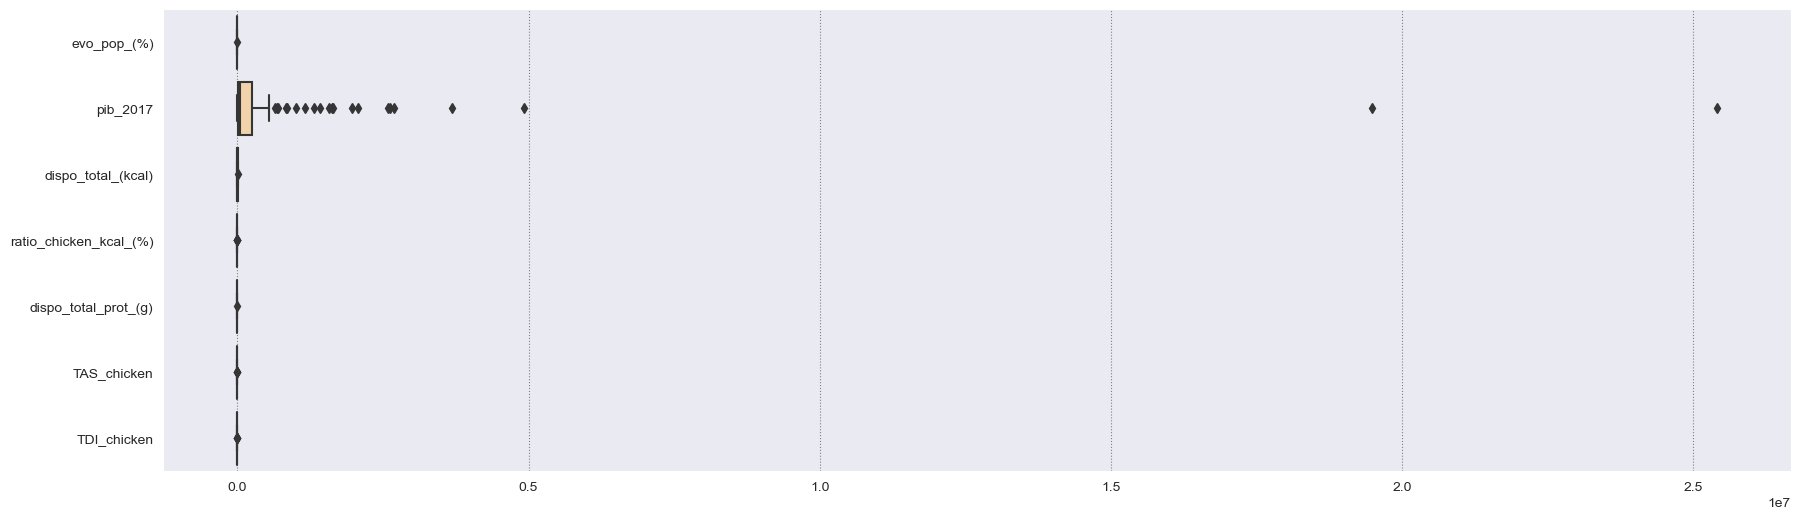

In [83]:
# Au vu du boxplot, il serait peut être plus intéressant de chercher des outliers sur un df standardisé
# Sur ce boxplot les echelles de données sont différentes donc la visualisation globale est impossible
plt.figure(figsize = (21,6))
sns.boxplot(data = df_final, orient = 'h', palette = 'OrRd')

In [84]:
df_final.describe()

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
count,165.000000,1.650000e+02,165.000000,165.000000,165.000000,165.000000,165.000000
mean,1.069223,5.604472e+05,2913.030303,0.025355,82.669152,0.787762,0.431920
std,0.065172,2.542716e+06,881.476944,0.020762,33.450153,0.489268,0.470625
min,0.929695,1.881820e+02,1754.000000,0.000000,39.910000,0.000000,0.000000
25%,1.021631,1.235760e+04,2512.000000,0.008602,63.950000,0.400000,0.041949
50%,1.057590,4.417908e+04,2864.000000,0.020378,80.530000,0.884615,0.242424
75%,1.115580,2.479322e+05,3258.000000,0.035006,96.270000,1.000000,0.781250
max,1.333873,2.540441e+07,12525.000000,0.095924,425.400000,3.046053,2.223684


##### *3.1.1. Pays écartés - 2e RUN*

In [85]:
# La projection de l'ACP (1er RUN) m'a permis d'identifier certains pays très éloigné
# On remarque trois pays vraiment très écartés, outliers  ?
# Sur les deux premières composantes (F1-F2) : Inde, USA, Chine
# Sur les deux suivantes (si ACP sur plus de deux composantes) (F2-F3) : USA, Brésil, Inde

In [86]:
# Cette réflexion résulte de la première run de préparation afin d'affiner nos data

# Mise en mask des pays pouvant biaiser l'analyse (vu lors de l'ACP et d'un premier clustering)
# On écarte également la France car nous somme le pays exportateur (on le met dans la liste des pays écartés)
mask_pays_out = ['Chine', 'Inde', 'Brésil', "États-Unis d'Amérique", 'France']

# On garde quand même ces pays dans un autre df pour les analyser
df_final_outlier = df_final.loc[df_final.index.isin(mask_pays_out)]

# On enlève ces pays du df final
df_final = df_final.loc[~df_final.index.isin(mask_pays_out)]

df_final_outlier.head()

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
Brésil,1.042885,2.063515e+06,3250.0,0.062769,90.87,1.422661,0.000301
Chine,1.026471,2.540441e+07,12525.0,0.042874,425.40,0.982853,0.080177
France,1.020110,2.595151e+06,3556.0,0.025872,112.08,1.112524,0.321678
Inde,1.057590,2.624329e+06,2515.0,0.002783,65.70,0.968315,0.000000
États-Unis d'Amérique,1.035157,1.947734e+07,3762.0,0.058214,113.61,1.199715,0.006734


In [87]:
# Informations sur les pays mis de coté
df_data_pivot.loc[df_data_pivot['zone'].isin(mask_pays_out)]

item                      zone Alimentation pour touristes  \
product                                              Total   
year                                                2017.0   
23                      Brésil                         NaN   
33                       Chine                      -338.0   
50                      France                         NaN   
65                        Inde                         0.0   
168      États-Unis d'Amérique                         NaN   

item                        Aliments pour animaux                      \
product Viande de Volailles                 Total Viande de Volailles   
year                 2017.0                2017.0              2017.0   
23                      NaN               90503.0                 NaN   
33                    -21.0              416846.0                 NaN   
50                      NaN               29931.0                 NaN   
65                      0.0               65899.0                 NaN   
168                     NaN              151389.0                 NaN   

item    Autres utilisations (non alimentaire)                      \
product                                 Total Viande de Volailles   
year                                   2017.0              2017.0   
23                                   333137.0                 NaN   
33                                   112045.0                32.0   
50                                    18866.0                 NaN   
65                                    17939.0                 NaN   
168                                  171964.0                89.0   

item    Disponibilité alimentaire (Kcal/personne/jour)                      \
product                                          Total Viande de Volailles   
year                                            2017.0              2017.0   
23                                              3250.0               204.0   
33                                             12525.0               537.0   
50                                              3556.0                92.0   
65                                              2515.0                 7.0   
168                                             3762.0               219.0   

item    Disponibilité alimentaire en quantité (kg/personne/an)  ... Résidus  \
product                                                  Total  ...   Total   
year                                                    2017.0  ...  2017.0   
23                                                  770.49      ... -1210.0   
33                                                 3111.05      ...  -802.0   
50                                                  943.52      ...  -332.0   
65                                                  530.81      ...  -594.0   
168                                                 990.38      ...  2576.0   

item                        Semences                     Traitement  \
product Viande de Volailles    Total Viande de Volailles      Total   
year                 2017.0   2017.0              2017.0     2017.0   
23                      0.0   4081.0                 NaN   398473.0   
33                   -126.0  22816.0                 NaN   257158.0   
50                     -2.0   1683.0                 NaN    52087.0   
65                      0.0  34046.0                 NaN   278717.0   
168                     0.0  12380.0                 NaN   152924.0   

item                                   Valeur US $                \
product Viande de Volailles Produit Intérieur Brut                 
year                 2017.0                 2012.0        2017.0   
23                      NaN           2.465228e+06  2.063515e+06   
33                      1.0           1.767601e+07  2.540441e+07   
50                     89.0           2.683825e+06  2.595151e+06   
65                      NaN           1.860877e+06  2.624329e+06   
168                    77.0           1.625397e+07  1.947734e+

In [88]:
# Sur ces pays on remarque principalement :
    # Chine et inde, une population de plus de 1 milliard d'habitants
    # On remarque également un PIB par habitant très élevé
    # Ces pays ont souvent des valeurs très au dessus des autres pays que ce soit en population, dispo int, production, import ou autre
    # Donc ils risquent de très fortement influencer notre analyse (surtout l'ACP qui est sensible aux outliers)
    # 3 pays n'importent quasiment pas de poulet et en produisent beaucoup, donc ils ne sont pas intéressant pour notre étude

# C'est pour cela que je préfère les écarter mais en les gardant dans un csv à part pour une analyse ultérieure

In [89]:
print('Nombre de pays avant traitement :', nb_pays)
print('Nombre de pays après traitement :', df_final.index.nunique())
# print('Nombre de lignes avec au moins UN NaN :', len(df_final[df_final.isna().any(axis=1)]))
print('---')
print('Nous gardons donc', round((df_final.index.nunique()*100)/nb_pays,2), '% des data de départ' )


Nombre de pays avant traitement : 171
Nombre de pays après traitement : 160
---
Nous gardons donc 93.57 % des data de départ


#### *3.2. Dépendance et infos sur les variables*

In [90]:
# On regarde la dépendance entre nos variables car si elles sont trop corrélées cela risque de poser des soucis lors de l'analyse

In [91]:
# Dépendance linéaire entre les variables :

# If the degree of correlation is high enough between variables, it can cause problems when fitting and interpreting the regression model

# The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows :

# A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model
# A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention
# A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model

In [92]:
# Explication du VIF :

# Multicollinearity in regression analysis occurs when two or more explanatory variables are highly correlated with each other, such that they do not provide unique or independent information
# in the regression model.

# If the degree of correlation is high enough between variables, it can cause problems when fitting and interpreting the regression model. 

# One way to detect multicollinearity is by using a metric known as the variance inflation factor (VIF), which measures the correlation and strength of correlation between
# the explanatory variables in a regression model.

In [93]:
# Calcul de la corrélation entre nos variables choisies (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame() # On créé un df vide
vif_data['feature'] = df_final.columns # On prend les colonnes de notre df
  
# Calcul du VIF pour chaque feature
vif_data['VIF'] = [variance_inflation_factor(df_final.values, i) for i in range(len(df_final.columns))]

# df de sortie avec les valeurs VIF
vif_data

,feature,VIF
0,evo_pop_(%),38.369594
1,pib_2017,1.330031
2,dispo_total_(kcal),187.087316
3,ratio_chicken_kcal_(%),2.901534
4,dispo_total_prot_(g),89.112657
5,TAS_chicken,5.149614
6,TDI_chicken,2.347336


In [94]:
# Quelques variables ont un facteur > 5, toutefois on les gardera pour la suite de l'analyse
# Trois variables ont un facteurtrès élevé, toutefois on les gardes car elle permettent de mieux caractériser un pays

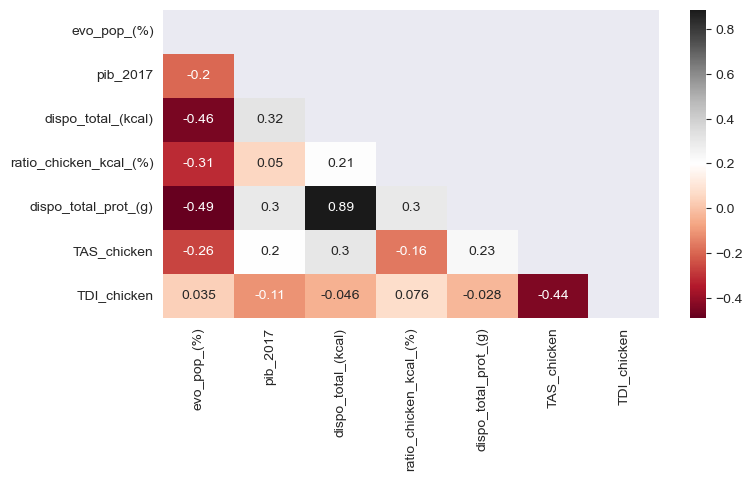

In [95]:
# Matrice de corrélation
# Calculate pairwise-correlation : df scaler
matrix = df_final.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(8, 4))
sns.heatmap(matrix, mask=mask, annot=True, cmap='RdGy')
plt.show()

In [96]:
# Applique un background au df pour avoir un visu des valeurs
# C'est une sorte de heatmap mais appliquée sur notre df
# df_final.style.background_gradient(cmap='OrRd')

### 4. Standardisation des données (pour ACP et autre)

In [97]:
# On centre/réduit nos données sans changer la distribution car selon les variables, les unitées ne sont pas les mêmes

In [98]:
df_final.sample(5)

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
République populaire démocratique de Corée,1.025370,17364.72493,2033.0,0.003935,52.27,1.000000,0.000000
Croatie,0.973691,56323.84039,3079.0,0.012017,90.18,1.355556,0.533333
Nicaragua,1.067249,13785.89285,2627.0,0.035402,66.00,1.036232,0.043478
Slovaquie,1.006096,95649.96626,2771.0,0.017322,62.25,0.959459,0.851351
Yémen,1.137360,18391.64982,2062.0,0.014549,53.24,0.682927,0.317073


In [99]:
# Vérification de NaN
df_final.isna().sum()

evo_pop_(%)               0
pib_2017                  0
dispo_total_(kcal)        0
ratio_chicken_kcal_(%)    0
dispo_total_prot_(g)      0
TAS_chicken               0
TDI_chicken               0
dtype: int64

In [100]:
# StandardScaler
# Scaling (StandardScaler()), transformation des données avec une moyenne = 0 et un ecart-type = 1

# On instancie notre scaler : 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# On entraine et transforme nos données :
X_scaled = scaler.fit_transform(df_final)

# On remet notre scale sous forme de df et on remet les index comme notre df de départ
df_scaled = pd.DataFrame(X_scaled, columns = df_final.columns, index =  df_final.index)
df_scaled

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
Afghanistan,1.439311,-0.382568,-1.868744,-1.093575,-1.317229,-0.582318,0.139698
Afrique du Sud,0.134217,0.211645,0.315470,1.117445,0.159154,0.020840,-0.424291
Albanie,-1.225940,-0.392216,1.226662,0.002727,1.982061,-1.019917,0.775006
Algérie,0.561707,-0.134346,1.105317,-0.895076,0.637831,0.440261,-0.923361
Allemagne,-0.752587,5.645586,1.577461,-0.243401,1.203770,0.191188,0.087588
...,...,...,...,...,...,...,...
Égypte,0.695798,-0.093241,1.039129,-0.480557,0.810337,0.239681,-0.752145
Émirats arabes unis,-0.493950,0.219449,1.160474,0.910139,1.364674,-1.346316,1.288910
Équateur,0.220642,-0.242370,-0.571453,0.349135,-0.728088,0.449003,-0.938664


In [101]:
# On voit bien que notre moyenne est de 0 et l'écart type de 1
df_scaled.describe().round(2)

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
count,160.00,160.00,160.00,160.00,160.00,160.00,160.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.14,-0.41,-2.40,-1.22,-2.03,-1.58,-0.94
25%,-0.74,-0.39,-0.77,-0.80,-0.83,-0.77,-0.84
50%,-0.13,-0.35,0.01,-0.24,-0.01,0.20,-0.41
75%,0.71,-0.06,0.88,0.42,0.75,0.45,0.75
max,4.01,7.68,2.04,3.46,3.08,4.63,3.77


In [102]:
# Quelques graphes

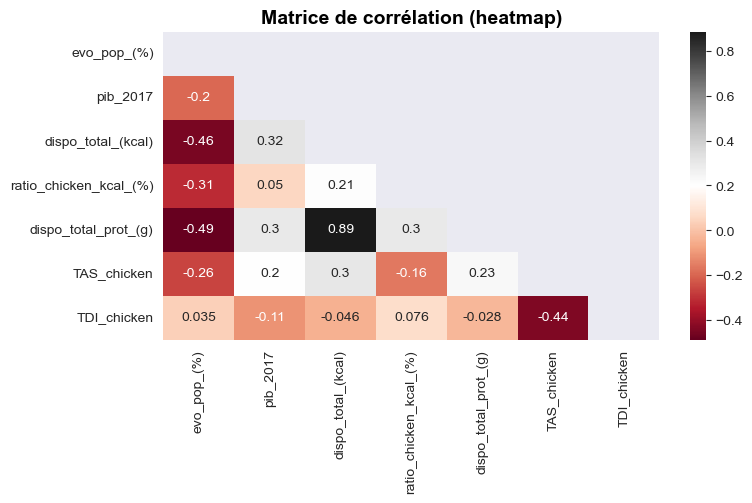

In [103]:
# Matrice de corrélation, on remarque qu'elle est identiqueà celle de nos données non centrée/réduite
# Calculate pairwise-correlation : df scaler
matrix = df_scaled.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(8, 4))

sns.heatmap(matrix, mask=mask, annot=True, cmap='RdGy')
plt.title('Matrice de corrélation (heatmap)', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

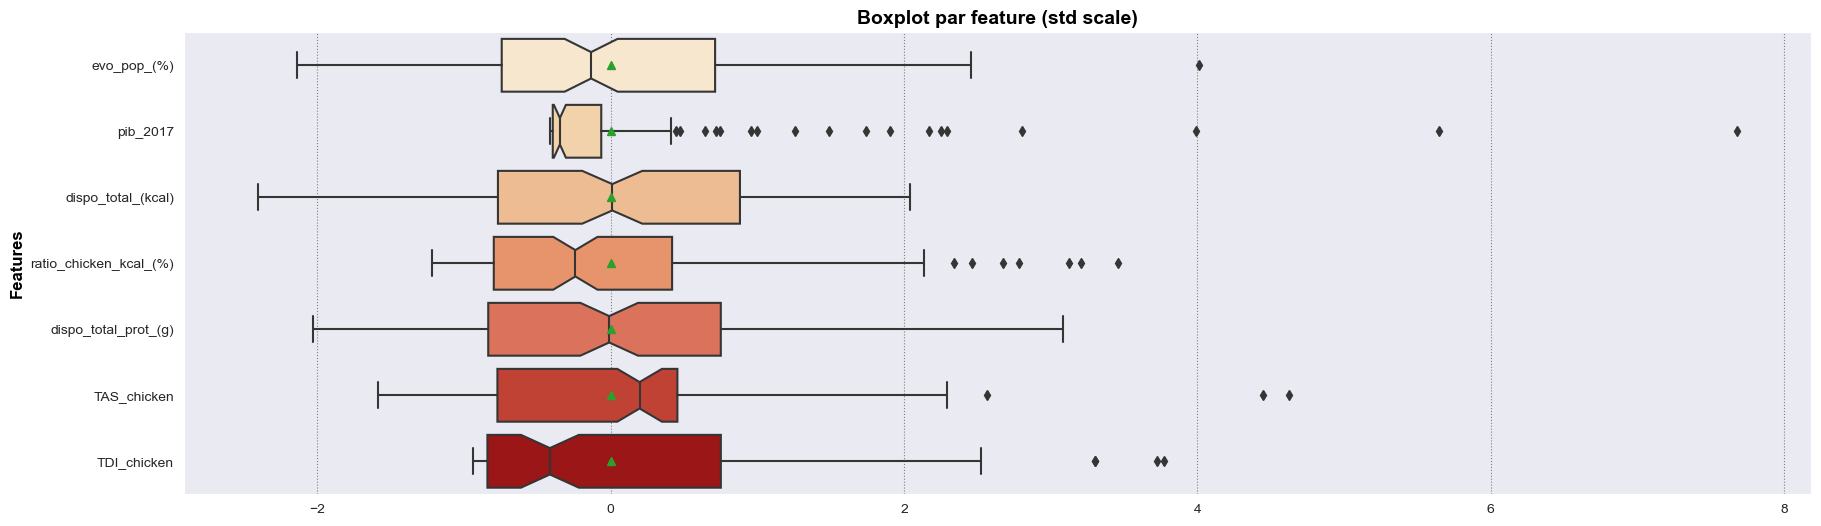

In [104]:
# Boxplot sur données standardisées pour vis de la répartition
plt.figure(figsize = (21,6))

sns.boxplot(data = df_scaled, orient = 'h', showmeans = True, palette = 'OrRd', notch=True)
plt.title('Boxplot par feature (std scale)', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Features', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

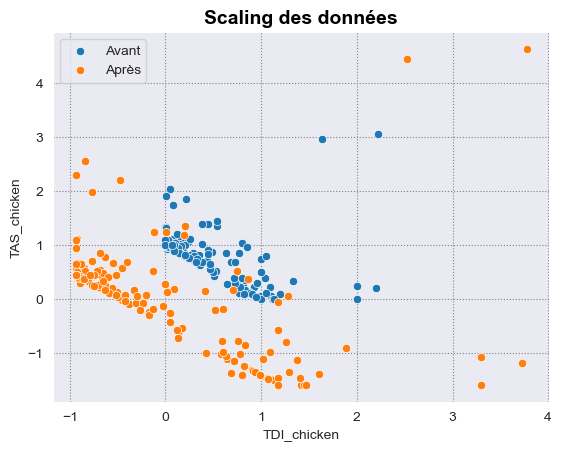

In [105]:
# Avant / Après scaling
# On voit que la distribution ne change pas, donc on garde de l'information
sns.scatterplot(data = df_final, x = 'TDI_chicken', y = 'TAS_chicken')
sns.scatterplot(data = df_scaled, x = 'TDI_chicken', y = 'TAS_chicken')

plt.title('Scaling des données', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.legend(['Avant', 'Après'])

plt.show()

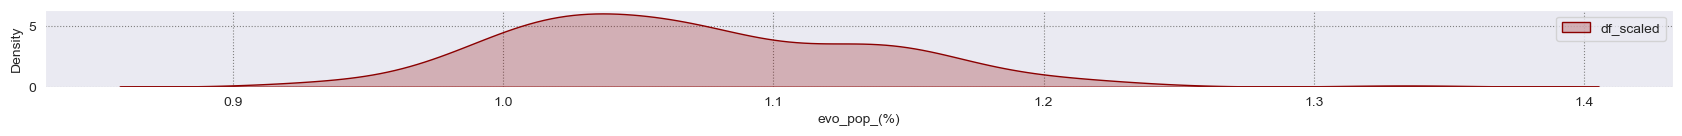

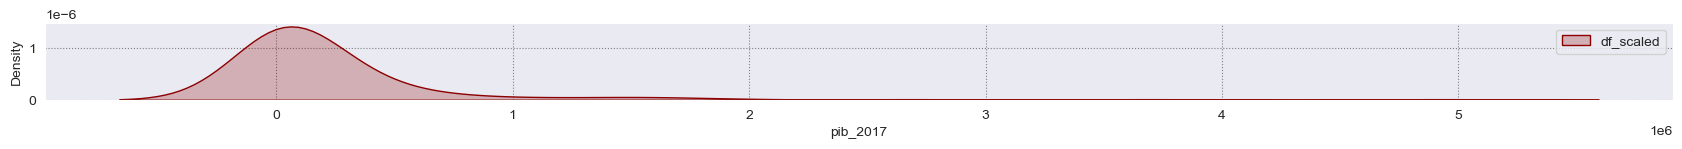

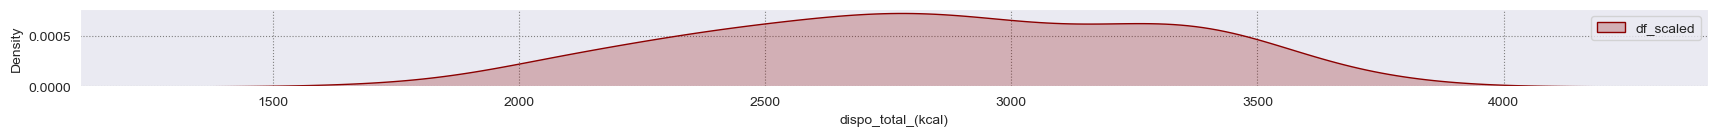

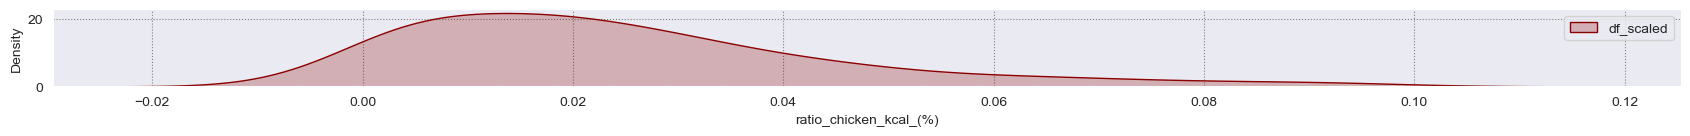

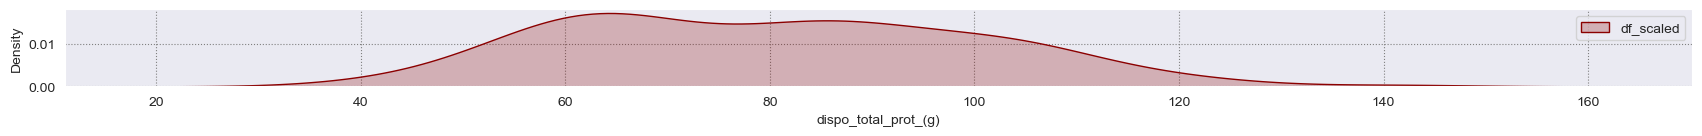

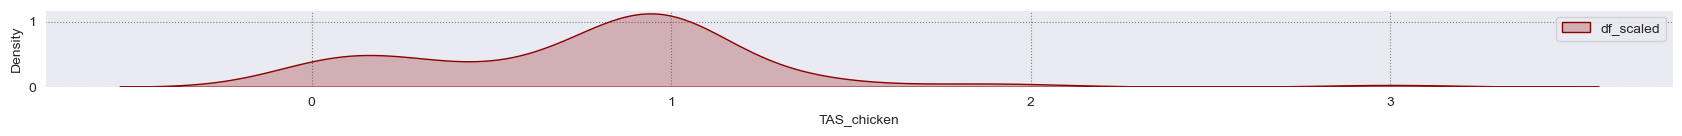

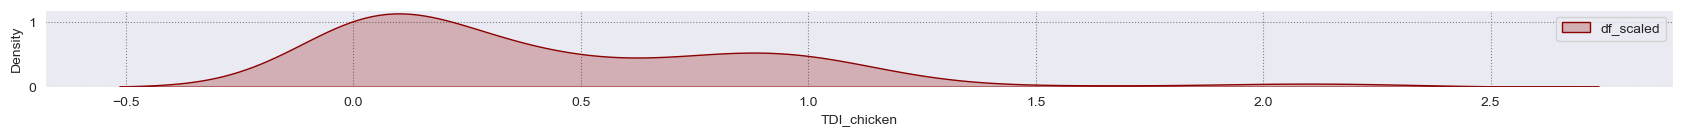

In [106]:
# Visu des dispersion
for i in df_final.columns:
    fig, ax = plt.subplots(1, 1, figsize = (21, 1))
    sns.kdeplot(ax = ax, data = df_final, x = i, fill = True, color = 'DarkRed')
    plt.legend(['df_scaled'])
    plt.show()

---
## Partie 3 - Exploration

### 1. ACP
---

In [107]:
df_scaled.head()

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
Afghanistan,1.439311,-0.382568,-1.868744,-1.093575,-1.317229,-0.582318,0.139698
Afrique du Sud,0.134217,0.211645,0.315470,1.117445,0.159154,0.020840,-0.424291
Albanie,-1.225940,-0.392216,1.226662,0.002727,1.982061,-1.019917,0.775006
Algérie,0.561707,-0.134346,1.105317,-0.895076,0.637831,0.440261,-0.923361
Allemagne,-0.752587,5.645586,1.577461,-0.243401,1.203770,0.191188,0.087588


In [108]:
# Définition du nombre de composantes voulues
# Après quelques essais, je pars sur 2 composante pour capter le maximum de variance
# Tout en restant raisonnable pour que cela soit exploitable facilement
n_components = 2

In [109]:
pca = PCA(n_components = n_components)

In [110]:
# On entraine sur nos données standardisées
# Celui ci sera stocker en mémoire comme un modèle de ml
pca.fit(df_scaled)

PCA(n_components=2)

In [111]:
# Variance expliquée
pca.explained_variance_ratio_

array([0.3826396 , 0.21252909])

In [112]:
# % de variance expliqué par composantes
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([38.26, 21.25])

In [113]:
# Somme cumulée des variances expliquées
scree_cum = scree.cumsum().round()
scree_cum

array([38., 60.])

In [114]:
# Nombre de composantes qui expliquent la variance
print(len(scree_cum), 'composantes expliquent', scree_cum[-1], '% de la variance')

2 composantes expliquent 60.0 % de la variance


In [115]:
# Nombre de composantes calculées
x_list = range(1, n_components+1)
list(x_list)

[1, 2]

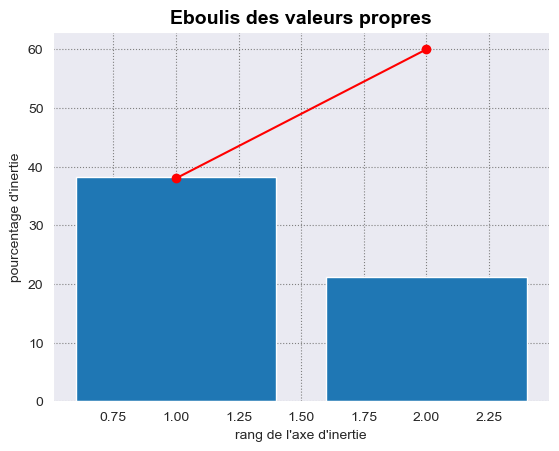

In [116]:
# Graphique d'éboulis des valeurs propres
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c= 'red', marker = 'o')

plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres", fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

plt.show(block=False)

In [117]:
# Composantes par variables
pcs = pca.components_
pcs

array([[-0.42708546,  0.29735149,  0.54093605,  0.22017428,  0.542509  ,
         0.28322766, -0.11643734],
       [-0.11471135, -0.13869757,  0.07584862,  0.47656265,  0.15232658,
        -0.58439263,  0.60829367]])

In [118]:
# On met les composantes sous forme de df
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,-0.427085,0.297351,0.540936,0.220174,0.542509,0.283228,-0.116437
1,-0.114711,-0.138698,0.075849,0.476563,0.152327,-0.584393,0.608294


In [119]:
# On récupère les features
features = df_scaled.columns
features

Index(['evo_pop_(%)', 'pib_2017', 'dispo_total_(kcal)',
       'ratio_chicken_kcal_(%)', 'dispo_total_prot_(g)', 'TAS_chicken',
       'TDI_chicken'],
      dtype='object')

In [120]:
# On regarde les composantes par variables
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
F1,-0.43,0.30,0.54,0.22,0.54,0.28,-0.12
F2,-0.11,-0.14,0.08,0.48,0.15,-0.58,0.61


In [121]:
# df des composantes par variables transposé
pcs.T.round(2)

,F1,F2
evo_pop_(%),-0.43,-0.11
pib_2017,0.30,-0.14
dispo_total_(kcal),0.54,0.08
ratio_chicken_kcal_(%),0.22,0.48
dispo_total_prot_(g),0.54,0.15
TAS_chicken,0.28,-0.58
TDI_chicken,-0.12,0.61


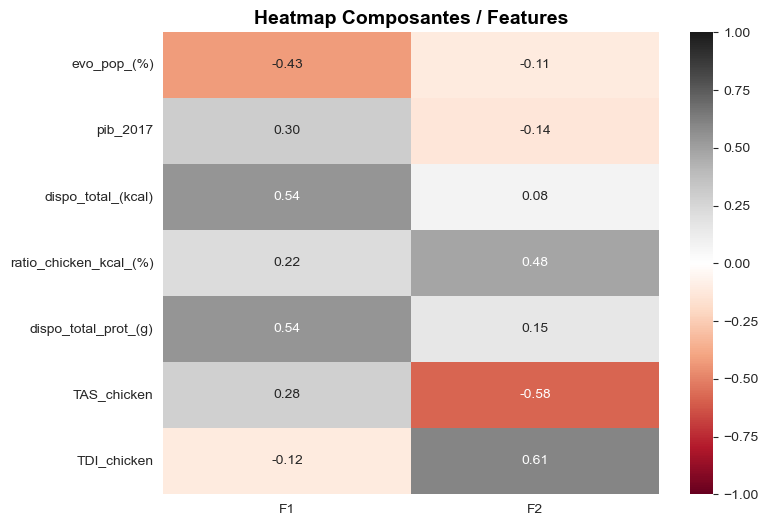

In [122]:
# On regarde la corrélation entre les variables et les axes pour avoir une première idée
# Heatmap sur les deux premières composantes uniquement
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="RdGy", fmt="0.2f")
plt.title('Heatmap Composantes / Features', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.show()

In [123]:
# Sur l'axe 1 et 2 nous avons pas mal de variables corrélées
# Sur F3 on remarque 2 variables très corrélées

#### *1.1. Cercle de corrélation*

In [124]:
# Fonction pour cercle de corrélation

In [125]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire, et c'est tout à fait mon genre bien sur ;)
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

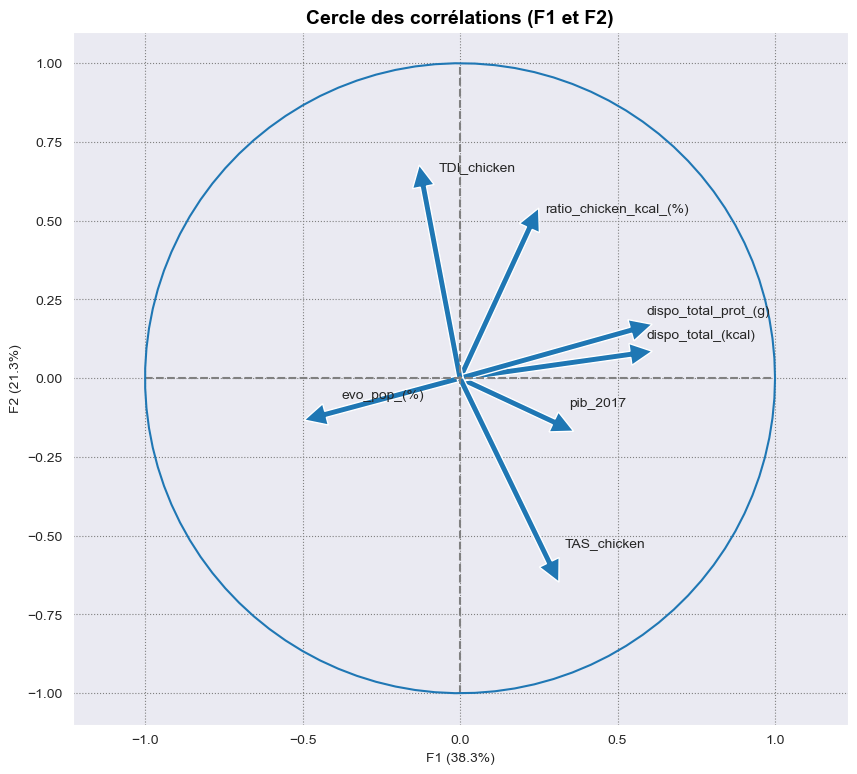

In [126]:
# On sélectionne les deux axes de projection pour le cercle de corrélations
x_y = (0,1)
x_y
correlation_graph(pca, x_y, features = features)

##### *Commentaires 1er RUN*

In [127]:
# Le cercle des corrélation est très difficile à interpréter car beaucoup de variables
# On n'arrive donc pas à dégager l'idée que représente ici les deux premiers axes

# Il serait bon de revoir les features sélectionnées ou en créer de nouvelles car certaines sont beaucoup trop corrélées

# On pourrait garder par exemple :
    # evo_pop
    # evo_pib
    # regarder la dispo, la production et l'import

# On pourrait déjà isoler deux gropues, une entre population et tout ce qui est dispo et un entre le pib et tout ce qui est import et prod

##### *Commentaires 2er RUN*

In [128]:
# Interpretation de F1, F2 ... :
    # F1 : Dispo selon l'évolution de la population, en gros plus y a de fous, moins y a de riz
    # Disponibilité selon évolution démographique
    # Résumé : Disponibilité alimentaire
    
    # F2 : Moins le pays produit pour lui plus il importe, balance entre la production et l'import pour nourrir la population
    # Résumé : Disponibilité selon la source

# Pour le clustering final, on fera cela sur les composantes de l'ACP

#### *1.2. Projection de l'ACP*

In [129]:
# Calcul des coordonnées de projection par individus
# On entraine et on transforme sur df_scaled que l'on met dans X_proj
X_proj = pca.fit_transform(df_scaled)
X_proj[:5]

array([[-2.8759171 , -0.55031167],
       [ 0.56394075,  0.26568098],
       [ 1.76727914,  1.65875306],
       [ 0.69922538, -1.11032488],
       [ 3.49686448, -0.56813001]])

In [130]:
# Fonction pour projection des individus sur les axes

In [131]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'Accent')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire... Hahaha, oui, c'est tout a fait mon genre mdr (merci le petit easter egg OCR ;) )
        # Cette fonction me reservira plus tard surement, elle fini dans ma cheat sheet ^^
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='10', ha='center', va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})", fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
    
    plt.show()

In [132]:
# On fait un df des composantes de nos individus sur les différents axes en vue de les rajouter dans notre CSV final
df_projection = pd.DataFrame(X_proj)
df_projection.columns = [f'F{i}' for i in x_list]
df_projection = df_projection.set_index(df_scaled.index)
df_projection

,F1,F2
pays,,
Afghanistan,-2.875917,-0.550312
Afrique du Sud,0.563941,0.265681
Albanie,1.767279,1.658753
Algérie,0.699225,-1.110325
Allemagne,3.496864,-0.568130
...,...,...
Égypte,0.726482,-0.691240
Émirats arabes unis,1.313300,2.326672
Équateur,-0.557080,-0.812938


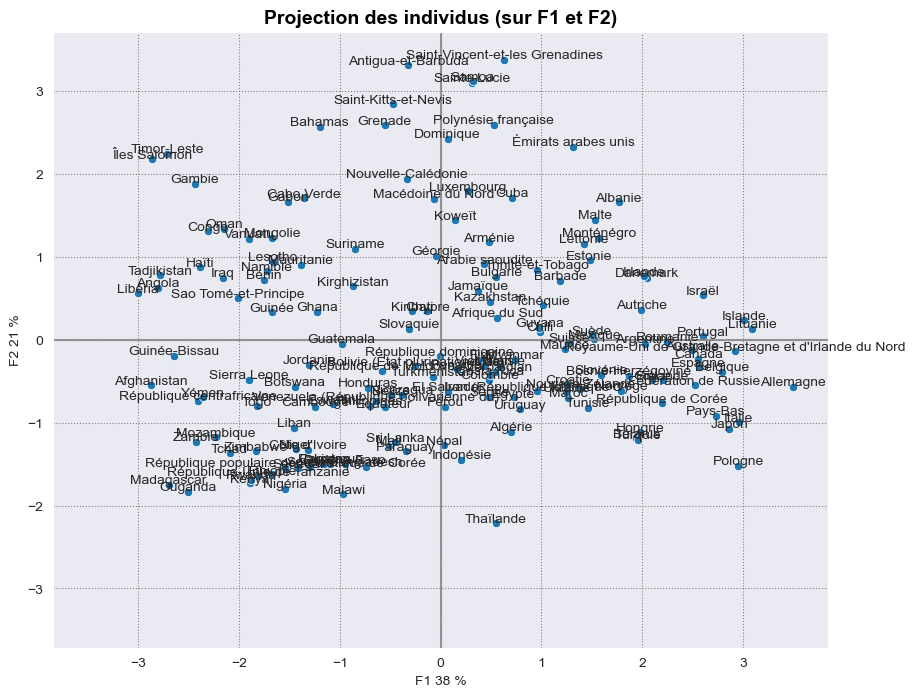

In [133]:
# On projete les individus sur F'x' et on les tri par les cluster que nous avons chercher sur les composantes
# On remarque que certains pays sont très éloignés...
# J'ai pris le clustering issu de KMeans
x_y = [0,1] # Choix des composantes de l'ACP à représenter dans le plan
display_factorial_planes(df_projection, x_y, pca = pca, labels = df_projection.index)

##### *Commentaires 1er RUN*

In [134]:
# Interpetation de la projection des individus - 1er RUN

    # On remarque x pays vraiment très écartés, outliers ? Biais dans les données
    # Sur les deux premières composantes (F1-F2) : Inde, USA, Chine, Brésil
    # Sur les deux premières composantes (F2-F3) : Inde, USA, Brésil, Japon

# On pourrait sortir ces pays de nos data de base pour avoir des données plus centrée et les garder dans un df/CSV à part pour tout de même les analyser
# Après avoir sorti les 4 pays la projection est déjà plus groupée, toutefois de nouveau pays apparaissent en dehors ce qui est normal (effet de zoom)

---
## Partie 4 - Test clustering après exploration

### 1. CAH
---

In [135]:
# L'idée est de faire un  premier clustering de nos données afin de voir comment cela se présente et d'écarter éventuellement certains pays qui biaisent l'analyse
# Ceci n'est pas le clustering final mais juste un test en amont de l'analyse suivante

In [136]:
# On importe les lib nécessaires
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [137]:
# On applique sur le df de l'ACP (plusde précision après avoir comparé en df_final df de l'ACP)
Z = linkage(df_projection, method = 'ward', optimal_ordering = True)
pd.DataFrame(Z)

,0,1,2,3
0,125.0,124.0,0.021413,2.0
1,146.0,23.0,0.021947,2.0
2,37.0,62.0,0.031187,2.0
3,70.0,115.0,0.045438,2.0
4,31.0,33.0,0.051741,2.0
...,...,...,...,...
154,300.0,309.0,6.566759,29.0
155,307.0,312.0,9.910613,66.0
156,315.0,311.0,13.433753,90.0
157,314.0,313.0,15.156412,70.0


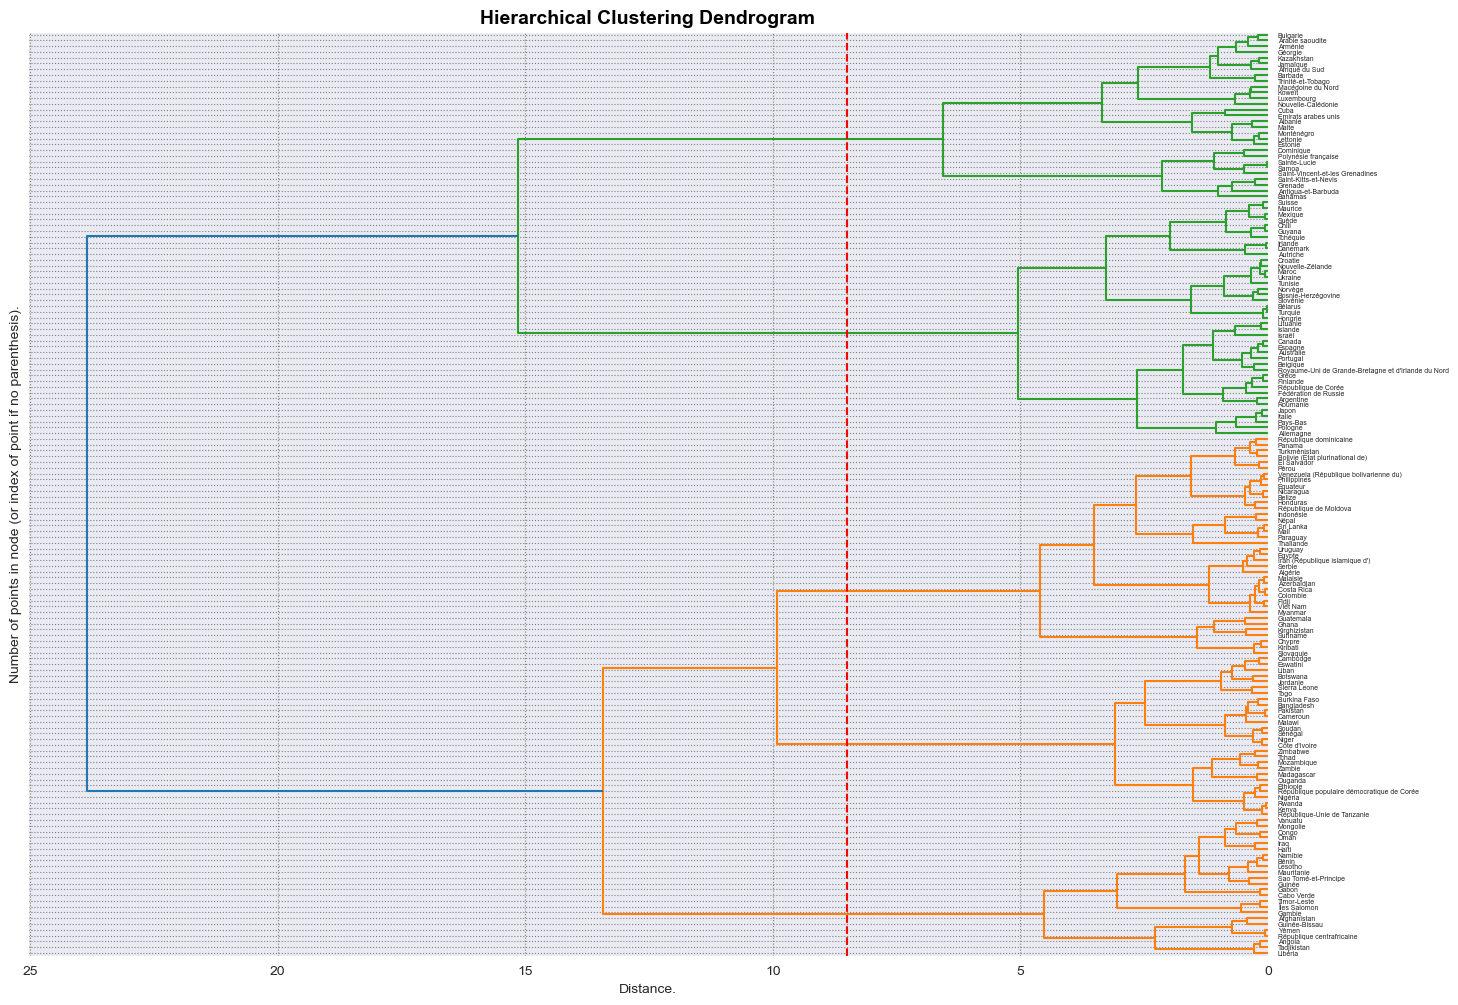

In [138]:
# On trace le dendrogramme
fig, ax = plt.subplots(1, 1, figsize = (16, 12))

dendrogram(Z, ax = ax, labels = df_projection.index, orientation = 'left', distance_sort = 'ascending')

# Tracé d'un ligne
plt.axvline(x = 8.5, color = 'red', linestyle = 'dashed')

plt.title("Hierarchical Clustering Dendrogram", fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel("Number of points in node (or index of point if no parenthesis).")
plt.xlabel("Distance.")
plt.show()

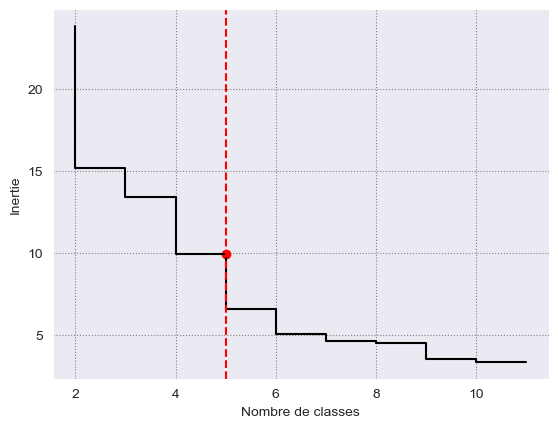

In [139]:
# On défini le nombre de cluster que l'on veut étudier
x = 10

# Recherche du nombre optimal de clusters
last = Z[-x:, 2]
last_rev = last[::-1]
idxs = np.arange(2, len(last) + 2)

# Graphe en escalier de la chute d'inertie par nombre de cluster
plt.step(idxs, last_rev, c = "black")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")

# Ici on teste le scénario où il y aurait x catégories
nombre = 5

# On trace la ligne correspondant au nombre de cluster
plt.scatter(idxs[np.where(idxs == nombre)], last_rev[np.where(idxs == nombre)], c = "red")
plt.axvline(idxs[np.where(idxs == nombre)], c = "red", linestyle = '--')
plt.show()

In [140]:
# On défini les paramètres du clustering après avoir regarder le dendrogramme et l'inertie par classe
cah = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

In [141]:
# On entraine sur les données de notre df final
cah.fit(df_projection)

AgglomerativeClustering(n_clusters=5)

In [142]:
# Visu des clustering effectués sur le df scaled
cah_cluster = pd.DataFrame(cah.labels_).rename(columns = {0 : 'cah_cluster'})
cah_cluster

,cah_cluster
0,3
1,0
2,0
3,1
4,2
...,...
155,1
156,0
157,1
158,4


In [143]:
# On regarde le nombre d'individus par cluster
# Ce clustering est bizarre...
cah_cluster['cah_cluster'].value_counts()

2    41
1    38
0    29
4    28
3    24
Name: cah_cluster, dtype: int64

In [144]:
# Ajout des clusters à l'ACP
# On reset l'index avant le merge puis on remet l'index sur pays
df_proj_cah = pd.merge(df_projection.reset_index(), cah_cluster, left_index = True, right_index = True).set_index('pays')
df_proj_cah

,F1,F2,cah_cluster
pays,,,
Afghanistan,-2.875917,-0.550312,3
Afrique du Sud,0.563941,0.265681,0
Albanie,1.767279,1.658753,0
Algérie,0.699225,-1.110325,1
Allemagne,3.496864,-0.568130,2
...,...,...,...
Égypte,0.726482,-0.691240,1
Émirats arabes unis,1.313300,2.326672,0
Équateur,-0.557080,-0.812938,1


In [145]:
# Calcul des centroides
centroide_cah = df_proj_cah.groupby('cah_cluster').mean()
# On reset l'index et on les renomme en centroide
centroide_cah = centroide_cah.reset_index()
centroide_cah['cah_cluster'] = 'centroide'
centroide_cah


,cah_cluster,F1,F2
0,centroide,0.486132,1.724420
1,centroide,-0.052455,-0.518700
2,centroide,2.079527,-0.330611
3,centroide,-2.190816,0.850317
4,centroide,-1.599484,-1.326789


In [146]:
# Ajout des centroides à l'ACP pour visualisation
# On les ajoutes à la suite de notre df
df_proj_cah_centroide = pd.concat([df_proj_cah, centroide_cah])
df_proj_cah_centroide

,F1,F2,cah_cluster
Afghanistan,-2.875917,-0.550312,3
Afrique du Sud,0.563941,0.265681,0
Albanie,1.767279,1.658753,0
Algérie,0.699225,-1.110325,1
Allemagne,3.496864,-0.568130,2
...,...,...,...
0,0.486132,1.724420,centroide
1,-0.052455,-0.518700,centroide
2,2.079527,-0.330611,centroide
3,-2.190816,0.850317,centroide


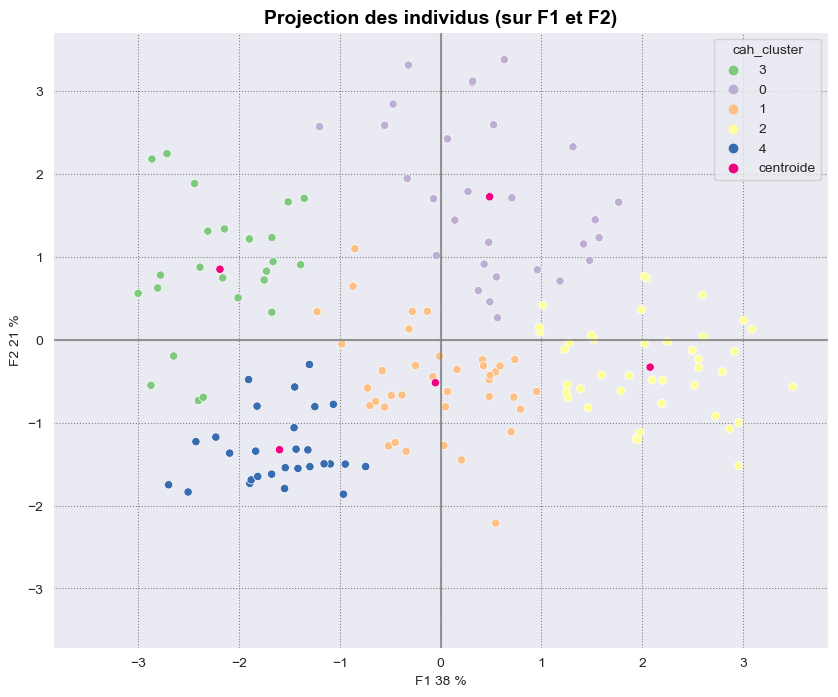

In [147]:
# Visualisation des individus avec clusters et centroides
x_y = [0,1] # Choix des composantes de l'ACP à représenter dans le plan
display_factorial_planes(df_proj_cah_centroide,
                         x_y,
                         pca = pca,
                         # labels = df_proj_cah_centroide.index,
                         clusters = df_proj_cah_centroide['cah_cluster'])

#### *Commentaires 1er RUN*

In [148]:
# On remarque 4 pays qui font un cluster à eu tout seul, ce sont les même que ceux identifiés lors de la projection des individus
# Ce sont des pays à forte population, PIB ou encore production
# Il serait bien de les isoler en amont dans un df à part afin qu'ils ne biaisent pas notre analyse
# Cela nous permettra de les traiter à par lors du choix dans la deuxième partie de l'étude

# On remarque également sur le graph d'inertie que cela nous indiquerait seulement trois clusters... Ce qui est clairement trop faible pour notre analyse

# APrès avoir traité les 4 pays extrêmes, le dendrogramme est déjà plus cohérent et on remarque que l'on pourrait passer à présent à 4 clusters
# Toutefois un cluster est vraiment trop grand et d'autre part, l'indonésie représente un cluster à elle seule (après visu des données de l'indonésie, on ne l'écarte pas)

# Pour  cela à présent, revoir les features qui différencies bien les pays et en rapport avec l'étude

#### *Commentaires 2er RUN*

In [149]:
# Nos cluster sont bien séparé au vu des centroides
# Le graphe d'inertie montre bien que 5 cluster sont logiques

# Peut être rajouter quelques features au df de sortie pour mieux appréhender les pays

---
## Partie 5 - CSV Final

In [150]:
# Ici on génère deux csv pour la deuxième partie de notre analyse

# Un premier avec nos pays sélectionnés ainsi que l'ACP

In [151]:
# Notre dataset brut
df_final.head()

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
Afghanistan,1.164779,1.889635e+04,1997.0,0.002504,54.09,0.491228,0.508772
Afrique du Sud,1.079063,3.808514e+05,2987.0,0.047874,83.36,0.787063,0.242682
Albanie,0.989730,1.301973e+04,3400.0,0.025000,119.50,0.276596,0.808511
Algérie,1.107140,1.700970e+05,3345.0,0.006577,92.85,0.992780,0.007220
Allemagne,1.020819,3.690849e+06,3559.0,0.019949,104.07,0.870615,0.484186


In [152]:
# Dataset des composantes des individus
df_projection.head()

,F1,F2
pays,,
Afghanistan,-2.875917,-0.550312
Afrique du Sud,0.563941,0.265681
Albanie,1.767279,1.658753
Algérie,0.699225,-1.110325
Allemagne,3.496864,-0.568130


In [153]:
# Dataset des pays écartés
# Attention, pas d'ACP faite sur ces données, ils devront être pris individuellement
df_final_outlier

,evo_pop_(%),pib_2017,dispo_total_(kcal),ratio_chicken_kcal_(%),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,
Brésil,1.042885,2.063515e+06,3250.0,0.062769,90.87,1.422661,0.000301
Chine,1.026471,2.540441e+07,12525.0,0.042874,425.40,0.982853,0.080177
France,1.020110,2.595151e+06,3556.0,0.025872,112.08,1.112524,0.321678
Inde,1.057590,2.624329e+06,2515.0,0.002783,65.70,0.968315,0.000000
États-Unis d'Amérique,1.035157,1.947734e+07,3762.0,0.058214,113.61,1.199715,0.006734


In [154]:
# Voir pour rajouter des features avec un pd.merge éventuellement avec un joint left
df_ajout = pd.DataFrame()

# Données de pays et population
df_ajout['pays'] = df_data_pivot['zone'] # Servira d'index par la suite car les données sont propres à un pays (clé primaire)

df_ajout['pop_2017'] = df_data_pivot['Population totale']['Population-Estimations'][year_b]
df_ajout['evo_pib_(%)'] = df_data_pivot['Valeur US $']['Produit Intérieur Brut'][year_b] / df_data_pivot['Valeur US $']['Produit Intérieur Brut'][year_a]


df_ajout

,pays,pop_2017,evo_pib_(%)
0,Afghanistan,36296.113,0.987451
1,Afrique du Sud,57009.756,0.876736
2,Albanie,2884.169,1.056815
3,Algérie,41389.189,0.813631
4,Allemagne,82658.409,1.046353
...,...,...,...
166,Émirats arabes unis,9487.203,1.029405
167,Équateur,16785.361,1.186197
168,États-Unis d'Amérique,325084.756,1.198313
169,Éthiopie,106399.924,1.819326


In [155]:
# On regroupe df_final et df_projection et pour l'exporter en .csv
# En faisant how = left, on ne joint que les pays qui sont dans notre df final sans prendre les pays avec des NaN ou ceux mis de coté
csv_clustering = pd.merge(left = df_final, right = df_projection, left_index = True, right_index = True, how = 'outer')

# On ajoute quelques données en plus
csv_clustering = pd.merge(left = csv_clustering, right = df_ajout, left_on = csv_clustering.index, right_on = 'pays', how = 'left')
csv_clustering.set_index('pays', inplace = True)

# On réarrange les colonnes pour meilleure lisibilité
csv_clustering = csv_clustering[['evo_pop_(%)', 'pop_2017',  'evo_pib_(%)', 'pib_2017', 'ratio_chicken_kcal_(%)', 'dispo_total_(kcal)', 'dispo_total_prot_(g)', 'TAS_chicken', 'TDI_chicken', 'F1', 'F2']].copy()

csv_clustering

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken,F1,F2
pays,,,,,,,,,,,
Afghanistan,1.164779,36296.113,0.987451,1.889635e+04,0.002504,1997.0,54.09,0.491228,0.508772,-2.875917,-0.550312
Afrique du Sud,1.079063,57009.756,0.876736,3.808514e+05,0.047874,2987.0,83.36,0.787063,0.242682,0.563941,0.265681
Albanie,0.989730,2884.169,1.056815,1.301973e+04,0.025000,3400.0,119.50,0.276596,0.808511,1.767279,1.658753
Algérie,1.107140,41389.189,0.813631,1.700970e+05,0.006577,3345.0,92.85,0.992780,0.007220,0.699225,-1.110325
Allemagne,1.020819,82658.409,1.046353,3.690849e+06,0.019949,3559.0,104.07,0.870615,0.484186,3.496864,-0.568130
...,...,...,...,...,...,...,...,...,...,...,...
Égypte,1.115946,96442.591,0.705641,1.951353e+05,0.015083,3315.0,96.27,0.894400,0.088000,0.726482,-0.691240
Émirats arabes unis,1.037806,9487.203,1.029405,3.856055e+05,0.043620,3370.0,107.26,0.116505,1.050971,1.313300,2.326672
Équateur,1.084739,16785.361,1.186197,1.042959e+05,0.032108,2585.0,65.77,0.997067,0.000000,-0.557080,-0.812938


In [156]:
# La même chose pour les pays écartés
csv_pays_out = pd.merge(left = df_final_outlier, right = df_ajout, left_on = df_final_outlier.index, right_on = 'pays', how = 'left')
csv_pays_out.set_index('pays', inplace = True)

# On réarrange les colonnes pour meilleure lisibilité
csv_pays_out = csv_pays_out[['evo_pop_(%)', 'pop_2017',  'evo_pib_(%)', 'pib_2017', 'ratio_chicken_kcal_(%)', 'dispo_total_(kcal)', 'dispo_total_prot_(g)', 'TAS_chicken', 'TDI_chicken']].copy()

csv_pays_out

,evo_pop_(%),pop_2017,evo_pib_(%),pib_2017,ratio_chicken_kcal_(%),dispo_total_(kcal),dispo_total_prot_(g),TAS_chicken,TDI_chicken
pays,,,,,,,,,
Brésil,1.042885,207833.823,0.837048,2.063515e+06,0.062769,3250.0,90.87,1.422661,0.000301
Chine,1.026471,1452625.244,1.437225,2.540441e+07,0.042874,12525.0,425.40,0.982853,0.080177
France,1.020110,64842.509,0.966960,2.595151e+06,0.025872,3556.0,112.08,1.112524,0.321678
Inde,1.057590,1338676.785,1.410264,2.624329e+06,0.002783,2515.0,65.70,0.968315,0.000000
États-Unis d'Amérique,1.035157,325084.756,1.198313,1.947734e+07,0.058214,3762.0,113.61,1.199715,0.006734


In [157]:
# Export du dataframe au format CSV pour analyse dans second notebook
csv_clustering.to_csv('csv_clustering.csv')

# Export du dataframe au format CSV pour analyse si besoin des pays écartés
csv_pays_out.to_csv('csv_pays_out.csv')

# FIN

In [158]:
# Merci de votre attention ;)